<a href="https://colab.research.google.com/github/alexandergribenchenko/Time_Series_Project/blob/main/PY_03_TS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 03 - Series de Tiempo**

## (Acámica - DS online 40 - Proyecto 03 - Alexander Ortega)

# **Alcance y objeto del proyecto:**


El presente proyecto tiene como finalidad exhibir e implementar un conjunto de herramientas analíticas y predictivas propias de las series de tiempo, empleando como contexto específico el estudio de los flujos vehiculares en las estaciones de peaje de la Ciudad de Buenos Aires entre los años 2017 - 2020.

##### ---> Librerías a emplear en el proyecto:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

## **Etapa 1.** Preparación del dataset de análisis

En la presente etapa,  que dividiremos en  5 pasos, recopilaremos y cargaremos la información primaria para el estudio, exploramos de manera general la información contenida en los datasets, procesaremos los atributos para cada uno de sus parámetros con la finalidad de obtener una uniformidad en la manera en la que se presenta la información, y finalmente obtendremos un único dataset que compilará toda la información base de una manera organizada y estructurada. Este dataset será al que haremos en la etapa posterior (etapa de análisis exploratorio de datos) todas las preguntas y que servirá para entender nuestro caso específico de estudio.

### **Paso 1.1.** Recopilación y descarga de la información primaria

La información base para el desarrollo del siguiente proyecto fue obtenida de la [página de datos abiertos de la Ciudad de Buenos Aires](https://data.buenosaires.gob.ar/), que en específico en la sección de movilidad presenta un grupo de [datasets relacionados con el paso de vehículos por las unidades de peaje AUSA.](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa)

Los dataset se presentan discriminados de manera anual desde el año 2008 hasta la actualidad y se puede acceder a ellos haciendo una descarga directa de sus archivos CSV. 

Para efectos del desarrollo del proyecto tomaremos únicamente los datasets de los años 2017, 2018 y 2019 como insumo para generar y evaluar los modelos de predicción. Los 3 CSV correspondientes fueron almacenados como parte de los repositorios del proyecto.

**Nota:** resulta particular de entrada que los datasets para los años de 2017 y 2018 sean del orden de 93MB y que el del año 2019 sea de 53MB. Ya veremos que está relacionado con el hecho de como se han agrupado los registros en los datasets para estos años. 

### **Paso 1.2.** Exploración y preparación del dataset base

Iniciaremos cargando y evaluando la información general de los 3 datasets descargados:

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
path_data_2017 = '/content/drive/MyDrive/Colab Notebooks/00_Acamica/flujo-vehicular-2017.csv'
path_data_2018 = '/content/drive/MyDrive/Colab Notebooks/00_Acamica/flujo-vehicular-2018.csv'
path_data_2019 = '/content/drive/MyDrive/Colab Notebooks/00_Acamica/flujo-vehicular-2019.csv'

In [4]:
data_2017 = pd.read_csv(path_data_2017, sep =',')
data_2018 = pd.read_csv(path_data_2018, sep =',')
data_2019 = pd.read_csv(path_data_2019, sep =',')

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [6]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [7]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


Corroboramos que los 3 datasets cuentan con los mismos 10 atributos: su nomenclatura y el tipo de variable es idéntica por lo cual pueden concatenarse de manera posterior sin inconveniente.

Exploremos de manera más específica cada unos de los tipos de atribitos:

- **Variables numéricas (periodo, hora_inicio, hora_fin y cantidad_pasos):** cada dataset anual toma de manera particular sus valores. 

- La variable **fecha** que actualmente aparece de tipo *object* se le dará un procesamiento específico para poder llevarla a tipo *datetime* y con ello hacer todas las transformaciones necesarias para estudiar  las series de tiempo (resampleos, agrupaciones, estimaciones de modelos, etc). Esto lo abordaremos de manera particular en el paso 1.4.

- **Variables categóricas**: Evaluemos ahora el tipo de información de los campos categoricos de los dataset, es decir **estacion, sentido, tipo_vehiculo** y **forma_pago**: 

##### **---> Exploración variable Estación:**

In [8]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


Observamos que para el año 2019 no hay una distinción entre las estaciones Dellepiane Centro y Dellepiane Liniers (se agrupan en una única denominada Dellepiane), como si ocurre en 2017 y 2018. Adicionalmente en el año 2019, la estación que se denominaba Alberdi en los años 2017 y 2018 fue renombrada como Alberti. Finalmente en el año 2019 entró una nueva estacion denoiminada PDB.

##### **---> Exploración variable Sentido:**

In [9]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


Hay coincidencia entre los registros de los 3 datasets por lo cual no deberá procesarse en atributo **sentido**.

##### **---> Exploración variable Tipo de vehículo:**

In [10]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


Hay coincidencia entre los registros de los 3 datasets por lo cual no deberá procesarse en atributo **tipo_vehiculo**.

##### **---> Exploración variable Forma de pago:**

In [11]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


Observamos que para los años 2019 y 2018 no se incluyen las formas de pago *Monedero* ni *Otros*. Verificaremos si estos tipos de pago son representativos entre la cantidad total de registros, o si podremos prescindir de ellos para homogeneidad del dataset. Adicional a ello la forma de pago que para 2019 se denomina *T. DISCAPACIDAD* en 2018 y 2019 recibía el nombre de *TARJETA DISCAPACIDAD* por lo cual se debe renombrar llevándola a una única nomenclatura.

#### **Consolidación del dataset base**

Dado que los 3 datasets cuentan con los mismos 10 atributos los concatenamos para generar el dataset base sobre el que iniciaremos a generar las transformaciones que ya se han evidenciado como necesarias en nuestra exploración previa: 

In [12]:
dataset = pd.concat([data_2017, data_2018, data_2019])
dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


##### **---> Información general del dataset**

Verificamos la información general del dataset consolidado:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   hora_inicio     int64 
 3   hora_fin        int64 
 4   dia             object
 5   estacion        object
 6   sentido         object
 7   tipo_vehiculo   object
 8   forma_pago      object
 9   cantidad_pasos  int64 
dtypes: int64(4), object(6)
memory usage: 298.8+ MB


##### **---> Valores Nulos**

Corroboramos si existen valores nulos para alguna categoría y evidenciamos que no existen valores nulos para ninguna categoría en ninguno de los 3 años en estudio.

In [ ]:
dataset.isnull().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

### **Paso 1.3.** Procesamiento de atributos generales

En esta sección procesaremos los atributos **estacion, sentido, tipo_vehiculo y forma_pago** acorde a los elementos ya encontrados en la exploración realizada en el paso 1.2:

**Nota general para la sección de procesamiento:** todas las modificaciones que se realizan en adelante tienen como referente la nomenclatura del último año en estudio, dado que es la información más actualizada. La nomenclatura que se encuentre que difiera se hará uniforme con la del año 2019.


##### **---> Procesamiento variable estacion:**

Evaluamos todos las estaciones que tenemos:

In [13]:
dataset.estacion.unique()

array(['Alberdi', 'Avellaneda', 'Dellepiane Centro', 'Dellepiane Liniers',
       'Illia', 'Retiro', 'Salguero', 'Sarmiento', 'Alberti',
       'Dellepiane', 'PDB'], dtype=object)

Dado que a partir de 2019 la estación Dellepiane no distingue entre *centro* y *Liniers* la unificamos en una única llamada *Dellepiane*. Adicional a ello vemos que el peaje Alberti en años anteriores se estaba nombrando como *Alberdi*, por lo cual también serán renombrados todos los registros como *Alberti*.

In [ ]:
dataset.estacion.replace({'Dellepiane Centro': 'Dellepiane', 'Dellepiane Liniers': 'Dellepiane',
                 'Alberdi': 'Alberti'}, inplace=True)
dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberti,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberti,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberti,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberti,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberti,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


Evaluamos la salida tras el procesamiento y corroboramos que el cambio funciona bien:

In [14]:
dataset.estacion.unique()

array(['Alberdi', 'Avellaneda', 'Dellepiane Centro', 'Dellepiane Liniers',
       'Illia', 'Retiro', 'Salguero', 'Sarmiento', 'Alberti',
       'Dellepiane', 'PDB'], dtype=object)

##### **---> Procesamiento variable sentido:**

Evaluamos los valores que toma la variable *sentido* y encontramos que la variable no necesita procesamiento:

In [15]:
dataset.sentido.unique()

array(['Centro', 'Provincia'], dtype=object)

##### **---> Procesamiento variable tipo_vehiculo:**

Evaluamos los valores que toma la variable *tipo_vehiculo* y encontramos que la variable no necesita procesamiento:

In [16]:
dataset.tipo_vehiculo.unique()

array(['Liviano', 'Pesado'], dtype=object)

##### **---> Procesamiento variable forma_pago:**



Evaluamos los valores que toma la variable *forma_pago*:


In [17]:
dataset.forma_pago.unique()

array(['NO COBRADO', 'TELEPASE', 'EFECTIVO', 'TARJETA DISCAPACIDAD',
       'EXENTO', 'INFRACCION', 'MONEDERO', 'Otros', 'T. DISCAPACIDAD'],
      dtype=object)

Vemos que la tarjeta de discapacidad tiene 2 nombre diferentes, la edificaremos a como esta en 2019:

In [18]:
dataset.forma_pago.replace({'TARJETA DISCAPACIDAD': 'T. DISCAPACIDAD'}, inplace=True)
dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


Evaluamos la salida tras el procesamiento y corroboramos que el cambio funciona bien:


In [19]:
dataset.forma_pago.unique()

array(['NO COBRADO', 'TELEPASE', 'EFECTIVO', 'T. DISCAPACIDAD', 'EXENTO',
       'INFRACCION', 'MONEDERO', 'Otros'], dtype=object)

Evaluamos además la cantidad de registros en cada tipo de pago:

In [20]:
dataset.forma_pago.value_counts()

TELEPASE           1027861
EFECTIVO           1020176
EXENTO              464708
INFRACCION          405034
NO COBRADO          380450
T. DISCAPACIDAD     262455
MONEDERO                14
Otros                    8
Name: forma_pago, dtype: int64

Vemos que los tipo de pago *MONEDERO* y *Otros* tienen muy pocos registros, por lo cual los borraremos pues son poco significativos:

In [21]:
indx_drop=dataset[(dataset.forma_pago=='MONEDERO') | (dataset.forma_pago=='Otros')].index
dataset.drop(indx_drop, inplace=True)

Evaluamos la salida tras el procesamiento y corroboramos que el cambio funciona bien. Ahora también coinciden las formas de pago con las únicas que existen en 2019:

In [22]:
dataset.forma_pago.unique()

array(['NO COBRADO', 'TELEPASE', 'EFECTIVO', 'T. DISCAPACIDAD', 'EXENTO',
       'INFRACCION'], dtype=object)

Observamos el dataset obtenido tras eliminar los registros:

In [23]:
dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


### **Paso 1.4.** Procesamiento de atributos relacionados a fechas

##### **---> Preprocesamiento variable hora_fin:**

Reemplazamos en la hora final 0 por 24 para que no se presente error en la conversión que haremos a continuación. De lo contrario al hacer la conversión de hora se presentará 2017-01-01 00:00:00 en lugar de 2017-01-02 00:00:00

In [24]:
dataset.hora_fin.replace({0:24}, inplace=True)
dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,23,24,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,24,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,24,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,24,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


##### **---> Preprocesamiento variable fecha:**

Corroboramos que la columna fecha aún está en tipo objeto:

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560648 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   hora_inicio     int64 
 3   hora_fin        int64 
 4   dia             object
 5   estacion        object
 6   sentido         object
 7   tipo_vehiculo   object
 8   forma_pago      object
 9   cantidad_pasos  int64 
dtypes: int64(4), object(6)
memory usage: 298.8+ MB


Hacemos la conversión de la columna fecha a tipo datetime:

In [26]:
dataset.fecha = pd.to_datetime(dataset.fecha)

Corroboramos que la fecha se encuentra en formato datetime:

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560648 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   periodo         int64         
 1   fecha           datetime64[ns]
 2   hora_inicio     int64         
 3   hora_fin        int64         
 4   dia             object        
 5   estacion        object        
 6   sentido         object        
 7   tipo_vehiculo   object        
 8   forma_pago      object        
 9   cantidad_pasos  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 298.8+ MB


Reorganizamos para tener el dataset en una estructura ordenada:

In [28]:
dataset=dataset[['fecha', 'periodo', 'hora_inicio', 'hora_fin','dia', 
         'estacion','sentido', 'tipo_vehiculo', 'forma_pago','cantidad_pasos']]
dataset

,fecha,periodo,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017-01-01,2017,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017-01-01,2017,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017-01-01,2017,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017-01-01,2017,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017-01-01,2017,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
812148,2019-12-31,2019,23,24,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019-12-31,2019,23,24,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019-12-31,2019,23,24,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019-12-31,2019,23,24,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


##### **---> Generamos el atributo mes:**

Obtenemos el mes a partir de la columna fecha y lo incluimos en nuestro dataset:

In [32]:
dataset['mes'] = dataset['fecha'].dt.month
dataset

,fecha,periodo,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,dia_num,fecha_comp,mes
0,2017-01-01,2017,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25,6,2017-01-01 01:00:00,1
1,2017-01-01,2017,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7,6,2017-01-01 01:00:00,1
2,2017-01-01,2017,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5,6,2017-01-01 02:00:00,1
3,2017-01-01,2017,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2,6,2017-01-01 02:00:00,1
4,2017-01-01,2017,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94,6,2017-01-01 02:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812148,2019-12-31,2019,23,24,Martes,Salguero,Provincia,Liviano,NO COBRADO,7,1,2020-01-01 00:00:00,12
812149,2019-12-31,2019,23,24,Martes,Salguero,Provincia,Liviano,TELEPASE,4,1,2020-01-01 00:00:00,12
812150,2019-12-31,2019,23,24,Martes,Salguero,Provincia,Pesado,NO COBRADO,1,1,2020-01-01 00:00:00,12
812151,2019-12-31,2019,23,24,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7,1,2020-01-01 00:00:00,12


##### **---> Generamos el atributo dia_num:**

Obtenemos el numero del día a partir de la columna fecha y lo incluimos en nuestro dataset:

In [33]:
dataset['dia_num'] = dataset['fecha'].dt.weekday
dataset

,fecha,periodo,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,dia_num,fecha_comp,mes
0,2017-01-01,2017,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25,6,2017-01-01 01:00:00,1
1,2017-01-01,2017,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7,6,2017-01-01 01:00:00,1
2,2017-01-01,2017,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5,6,2017-01-01 02:00:00,1
3,2017-01-01,2017,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2,6,2017-01-01 02:00:00,1
4,2017-01-01,2017,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94,6,2017-01-01 02:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812148,2019-12-31,2019,23,24,Martes,Salguero,Provincia,Liviano,NO COBRADO,7,1,2020-01-01 00:00:00,12
812149,2019-12-31,2019,23,24,Martes,Salguero,Provincia,Liviano,TELEPASE,4,1,2020-01-01 00:00:00,12
812150,2019-12-31,2019,23,24,Martes,Salguero,Provincia,Pesado,NO COBRADO,1,1,2020-01-01 00:00:00,12
812151,2019-12-31,2019,23,24,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7,1,2020-01-01 00:00:00,12


Reorganizamos para tener el dataset en una estructura ordenada:

In [34]:
dataset=dataset[['fecha', 'periodo','mes', 'hora_inicio', 'hora_fin','dia','dia_num', 
         'estacion','sentido', 'tipo_vehiculo', 'forma_pago','cantidad_pasos']]
dataset

,fecha,periodo,mes,hora_inicio,hora_fin,dia,dia_num,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017-01-01,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017-01-01,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,TELEPASE,7
2,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...,...,...
812148,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019-12-31,2019,12,23,24,Martes,1,Sarmiento,Provincia,Liviano,NO COBRADO,7


##### **---> Generamos el atributo fecha_comp:**

Generamos una nueva columna de fecha compacta a partir de la columna fecha y hora:


In [35]:
dataset['fecha_comp'] = dataset.fecha + pd.to_timedelta(dataset.hora_fin, unit = 'h')
dataset

,fecha,periodo,mes,hora_inicio,hora_fin,dia,dia_num,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha_comp
0,2017-01-01,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,25,2017-01-01 01:00:00
1,2017-01-01,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,TELEPASE,7,2017-01-01 01:00:00
2,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,5,2017-01-01 02:00:00
3,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,2,2017-01-01 02:00:00
4,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,94,2017-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812148,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,NO COBRADO,7,2020-01-01 00:00:00
812149,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,TELEPASE,4,2020-01-01 00:00:00
812150,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Pesado,NO COBRADO,1,2020-01-01 00:00:00
812151,2019-12-31,2019,12,23,24,Martes,1,Sarmiento,Provincia,Liviano,NO COBRADO,7,2020-01-01 00:00:00


Reorganizamos para tener el dataset en una estructura ordenada:

In [36]:
dataset=dataset[['fecha_comp', 'fecha', 'periodo','mes', 'hora_inicio', 'hora_fin','dia', 'dia_num', 
         'estacion','sentido', 'tipo_vehiculo', 'forma_pago','cantidad_pasos']]
dataset

,fecha_comp,fecha,periodo,mes,hora_inicio,hora_fin,dia,dia_num,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017-01-01 01:00:00,2017-01-01,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017-01-01 01:00:00,2017-01-01,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,TELEPASE,7
2,2017-01-01 02:00:00,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017-01-01 02:00:00,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017-01-01 02:00:00,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812148,2020-01-01 00:00:00,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2020-01-01 00:00:00,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,TELEPASE,4
812150,2020-01-01 00:00:00,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2020-01-01 00:00:00,2019-12-31,2019,12,23,24,Martes,1,Sarmiento,Provincia,Liviano,NO COBRADO,7


Corroboramos los tipos de variable que tiene los atributos tras su inclusión:

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560648 entries, 0 to 812152
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   fecha_comp      datetime64[ns]
 1   fecha           datetime64[ns]
 2   periodo         int64         
 3   mes             int64         
 4   hora_inicio     int64         
 5   hora_fin        int64         
 6   dia             object        
 7   dia_num         int64         
 8   estacion        object        
 9   sentido         object        
 10  tipo_vehiculo   object        
 11  forma_pago      object        
 12  cantidad_pasos  int64         
dtypes: datetime64[ns](2), int64(6), object(5)
memory usage: 380.3+ MB


##### **---> Generamos el atributo fecha_num:**

Dado que implementaremos varios modelos de predicción y la mayoría de ellos no procesan atributos que no sean de tipo numérico (LinearRegression, XGBRegressor, etc) es necesario incluir una columna adicional con la transformación al ordinal gregoriano proléptico de una fecha que entrega la función ```datetime.toordinal```. Esta es una parte fundamental del proceso de transformación, pues sin ella no podríamos emplear la fecha de manera directa como una variable predictora en un modelo:

In [38]:
dataset['fecha_num'] = dataset.fecha.map(datetime.datetime.toordinal)
dataset

,fecha_comp,fecha,periodo,mes,hora_inicio,hora_fin,dia,dia_num,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha_num
0,2017-01-01 01:00:00,2017-01-01,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,25,736330
1,2017-01-01 01:00:00,2017-01-01,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,TELEPASE,7,736330
2,2017-01-01 02:00:00,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,5,736330
3,2017-01-01 02:00:00,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,2,736330
4,2017-01-01 02:00:00,2017-01-01,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,94,736330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812148,2020-01-01 00:00:00,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,NO COBRADO,7,737424
812149,2020-01-01 00:00:00,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,TELEPASE,4,737424
812150,2020-01-01 00:00:00,2019-12-31,2019,12,23,24,Martes,1,Salguero,Provincia,Pesado,NO COBRADO,1,737424
812151,2020-01-01 00:00:00,2019-12-31,2019,12,23,24,Martes,1,Sarmiento,Provincia,Liviano,NO COBRADO,7,737424


Corroboramos que la salida sea la adecuada y reorganizamos nuestro dataset:

In [40]:
dataset=dataset[['fecha_comp', 'fecha','fecha_num', 'periodo','mes', 'hora_inicio', 'hora_fin','dia', 'dia_num', 
         'estacion','sentido', 'tipo_vehiculo', 'forma_pago','cantidad_pasos']]
dataset

,fecha_comp,fecha,fecha_num,periodo,mes,hora_inicio,hora_fin,dia,dia_num,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017-01-01 01:00:00,2017-01-01,736330,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017-01-01 01:00:00,2017-01-01,736330,2017,1,0,1,Domingo,6,Alberdi,Centro,Liviano,TELEPASE,7
2,2017-01-01 02:00:00,2017-01-01,736330,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017-01-01 02:00:00,2017-01-01,736330,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017-01-01 02:00:00,2017-01-01,736330,2017,1,1,2,Domingo,6,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812148,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,TELEPASE,4
812150,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Sarmiento,Provincia,Liviano,NO COBRADO,7


### **Paso 1.5.** Dataset final para el análisis

Tras generar todas las transformaciones necesarias obtenemos finalmente el dataset que servirá de base para todo nuestro proceso de análisis y predicción:

In [ ]:
dataset

,fecha_comp,fecha,fecha_num,periodo,mes,hora_inicio,hora_fin,dia,dia_num,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017-01-01 01:00:00,2017-01-01,736330,2017,1,0,1,Domingo,6,Alberti,Centro,Liviano,NO COBRADO,25
1,2017-01-01 01:00:00,2017-01-01,736330,2017,1,0,1,Domingo,6,Alberti,Centro,Liviano,TELEPASE,7
2,2017-01-01 02:00:00,2017-01-01,736330,2017,1,1,2,Domingo,6,Alberti,Centro,Liviano,NO COBRADO,5
3,2017-01-01 02:00:00,2017-01-01,736330,2017,1,1,2,Domingo,6,Alberti,Centro,Liviano,EFECTIVO,2
4,2017-01-01 02:00:00,2017-01-01,736330,2017,1,1,2,Domingo,6,Alberti,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812148,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,TELEPASE,4
812150,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Sarmiento,Provincia,Liviano,NO COBRADO,7


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560648 entries, 0 to 812152
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   fecha_comp      datetime64[ns]
 1   fecha           datetime64[ns]
 2   fecha_num       int64         
 3   periodo         int64         
 4   mes             int64         
 5   hora_inicio     int64         
 6   hora_fin        int64         
 7   dia             object        
 8   dia_num         int64         
 9   estacion        object        
 10  sentido         object        
 11  tipo_vehiculo   object        
 12  forma_pago      object        
 13  cantidad_pasos  int64         
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 407.5+ MB


## **Etapa 2.** Análisis exploratorio de datos

In [ ]:
dataset

,fecha_comp,fecha,fecha_num,periodo,mes,hora_inicio,hora_fin,dia,dia_num,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017-01-01 01:00:00,2017-01-01,736330,2017,1,0,1,Domingo,6,Alberti,Centro,Liviano,NO COBRADO,25
1,2017-01-01 01:00:00,2017-01-01,736330,2017,1,0,1,Domingo,6,Alberti,Centro,Liviano,TELEPASE,7
2,2017-01-01 02:00:00,2017-01-01,736330,2017,1,1,2,Domingo,6,Alberti,Centro,Liviano,NO COBRADO,5
3,2017-01-01 02:00:00,2017-01-01,736330,2017,1,1,2,Domingo,6,Alberti,Centro,Liviano,EFECTIVO,2
4,2017-01-01 02:00:00,2017-01-01,736330,2017,1,1,2,Domingo,6,Alberti,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812148,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Salguero,Provincia,Liviano,TELEPASE,4
812150,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2020-01-01 00:00:00,2019-12-31,737424,2019,12,23,24,Martes,1,Sarmiento,Provincia,Liviano,NO COBRADO,7


##### ---> Bonus (Función de color normalizada para la paleta de color):

In [ ]:
# Función que nos permite definir la relación de color con base en el minimo 
# y el maximo de un conjunto de datos y una paleta de color elegida
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

### **Paso 2.1.** EDA - bivariado (totalidad del dataset)

#### 2.1.1. Cantidad de pasos Vs fecha 

#### ---> Cantidad de pasos Vs fecha (sin resampleo, sin agregación)

No handles with labels found to put in legend.


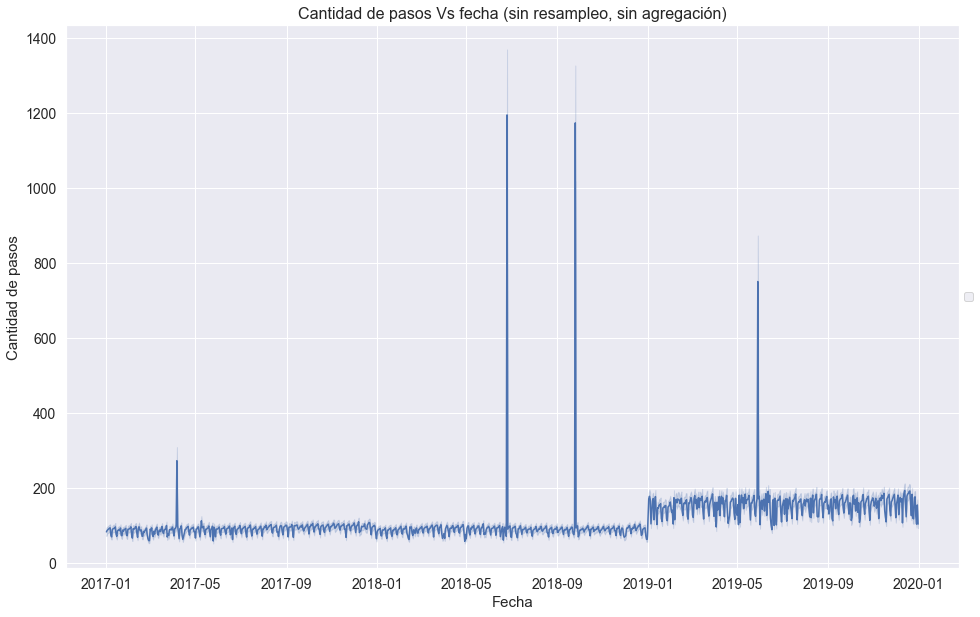

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset, x='fecha', y='cantidad_pasos')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (sin resampleo, sin agregación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
dataset[['cantidad_pasos']].describe()

,cantidad_pasos
count,3.560648e+06
mean,1.052153e+02
std,3.206296e+02
min,1.000000e+00
25%,2.000000e+00
50%,8.000000e+00
75%,3.400000e+01
max,6.677000e+03


In [ ]:
dataset[['periodo', 'cantidad_pasos']].groupby(['periodo']).describe()

cantidad_pasos                                                      
                 count        mean         std  min  25%   50%   75%     max
periodo                                                                     
2017         1372623.0   90.945185  301.640381  1.0  2.0   7.0  28.0  4271.0
2018         1375886.0   89.463204  291.091089  1.0  2.0   6.0  26.0  5722.0
2019          812139.0  156.020158  387.351812  1.0  4.0  15.0  72.0  6677.0

#### ---> Cantidad de pasos Vs fecha (resampleo: diario, sin agregación)

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'), 'periodo'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,cantidad_pasos
0,2017-01-01,2017,220442
1,2017-01-02,2017,337387
2,2017-01-03,2017,342933
3,2017-01-04,2017,355057
4,2017-01-05,2017,367739
...,...,...,...
1090,2019-12-27,2019,426490
1091,2019-12-28,2019,282127
1092,2019-12-29,2019,220000
1093,2019-12-30,2019,359913


In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

,cantidad_pasos
count,1095.000000
mean,342132.125114
std,62549.360309
min,156852.000000
25%,293376.000000
50%,361423.000000
75%,388229.000000
max,466887.000000


In [ ]:
dataset_analisis.groupby('periodo').describe()

cantidad_pasos                                                   \
                 count           mean           std       min       25%   
periodo                                                                   
2017             365.0  342009.457534  59585.887708  174988.0  299491.0   
2018             365.0  337236.082192  60880.603983  156852.0  287589.0   
2019             365.0  347150.835616  66727.276771  180069.0  298206.0   

                                       
              50%       75%       max  
periodo                                
2017     359073.0  383828.0  439981.0  
2018     361381.0  381546.0  441305.0  
2019     363539.0  397094.0  466887.0

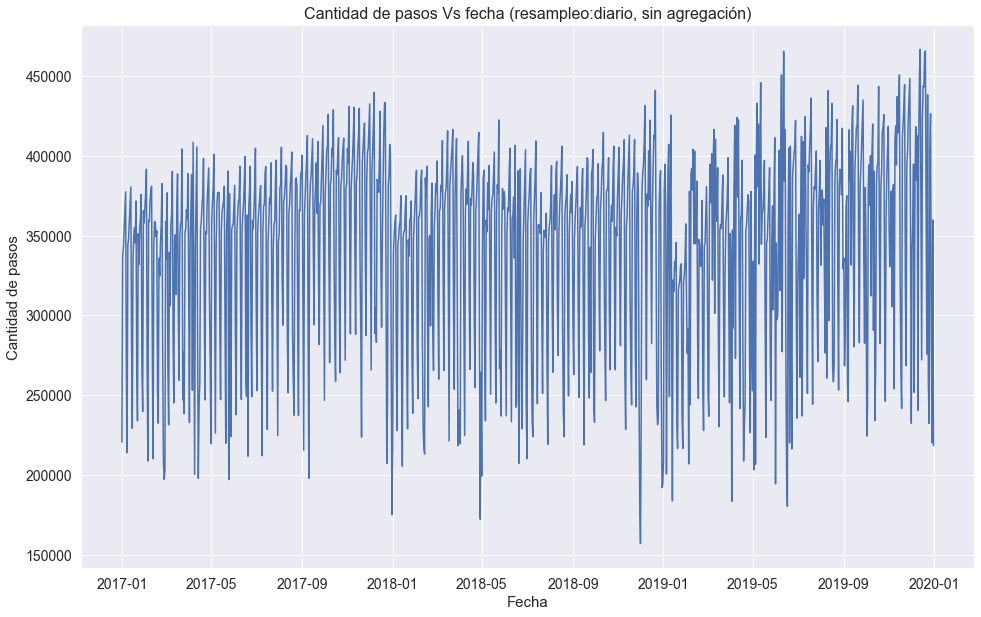

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo:diario, sin agregación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

<Figure size 720x360 with 0 Axes>

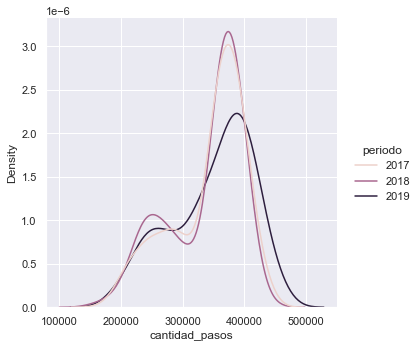

In [ ]:
plt.figure(figsize = (10,5))
sns.displot(data=dataset_analisis , x='cantidad_pasos', hue='periodo', kind="kde")

#### ---> Cantidad de pasos Vs fecha (resampleo: semanal, sin agregación)

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='W'), 'periodo'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,cantidad_pasos
0,2017-01-01,2017,220442
1,2017-01-08,2017,2260581
2,2017-01-15,2017,2314268
3,2017-01-22,2017,2257919
4,2017-01-29,2017,2282364
...,...,...,...
154,2019-12-08,2019,2533762
155,2019-12-15,2019,2613146
156,2019-12-22,2019,2882347
157,2019-12-29,2019,2259814


In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

,cantidad_pasos
count,1.590000e+02
mean,2.356193e+06
std,3.282608e+05
min,1.933550e+05
25%,2.277865e+06
50%,2.392401e+06
75%,2.500012e+06
max,2.882347e+06


In [ ]:
dataset_analisis.groupby('periodo').describe()

cantidad_pasos                                                    \
                 count          mean            std       min        25%   
periodo                                                                    
2017              53.0  2.355348e+06  332977.628562  220442.0  2271255.0   
2018              53.0  2.322475e+06  328023.094167  193355.0  2273366.0   
2019              53.0  2.390756e+06  326434.524579  578292.0  2311791.0   

                                          
               50%        75%        max  
periodo                                   
2017     2382623.0  2492836.0  2653142.0  
2018     2391074.0  2456470.0  2608145.0  
2019     2440537.0  2573575.0  2882347.0

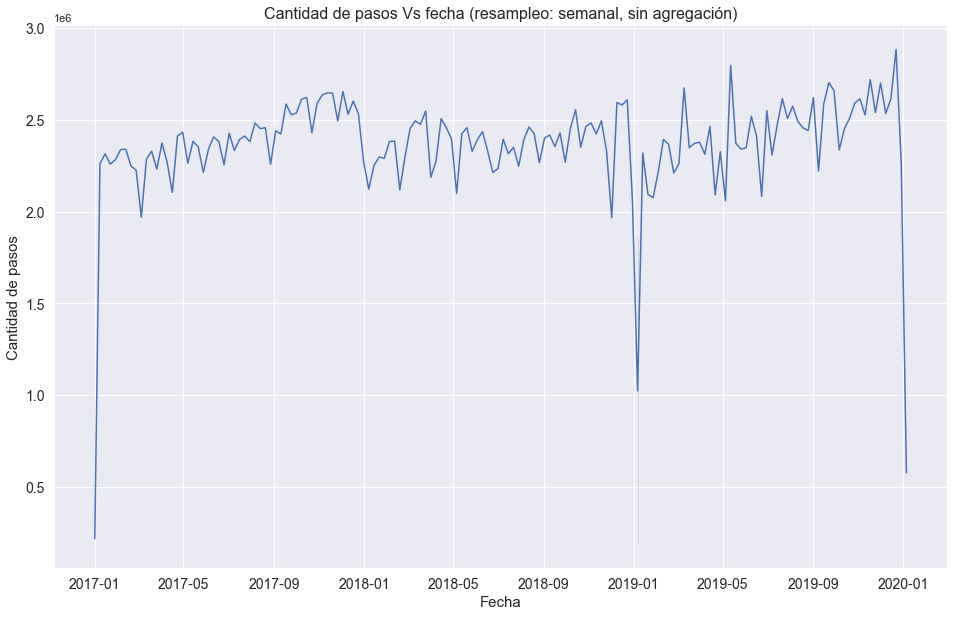

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: semanal, sin agregación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

<Figure size 720x360 with 0 Axes>

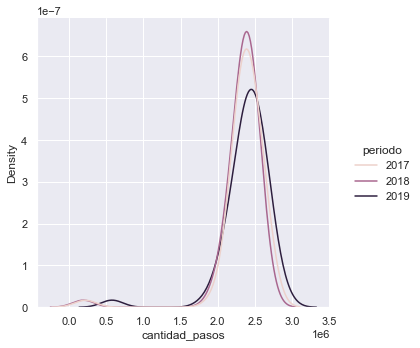

In [ ]:
plt.figure(figsize = (10,5))
sns.displot(data=dataset_analisis , x='cantidad_pasos', hue='periodo', kind="kde")

#### ---> Cantidad de pasos Vs fecha (resampleo: mensual, sin agregación)

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='MS'), 'periodo'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,cantidad_pasos
0,2017-01-01,2017,10059282
1,2017-02-01,2017,8825599
2,2017-03-01,2017,10237044
3,2017-04-01,2017,9764941
4,2017-05-01,2017,10279229
5,2017-06-01,2017,10181601
6,2017-07-01,2017,10421643
7,2017-08-01,2017,10810670
8,2017-09-01,2017,10752454
9,2017-10-01,2017,11259140


In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

,cantidad_pasos
count,3.600000e+01
mean,1.040652e+07
std,6.083218e+05
min,8.825599e+06
25%,1.005382e+07
50%,1.042784e+07
75%,1.088517e+07
max,1.128936e+07


In [ ]:
dataset_analisis.groupby('periodo').describe()

cantidad_pasos                                                       \
                 count          mean            std        min          25%   
periodo                                                                       
2017              12.0  1.040279e+07  687482.006222  8825599.0  10151021.25   
2018              12.0  1.025760e+07  461518.467173  9206000.0  10033958.75   
2019              12.0  1.055917e+07  664972.146859  9279665.0  10039269.00   

                                              
                50%          75%         max  
periodo                                       
2017     10350436.0  10852375.25  11264358.0  
2018     10214180.5  10559969.75  10900036.0  
2019     10795608.0  11081806.50  11289355.0

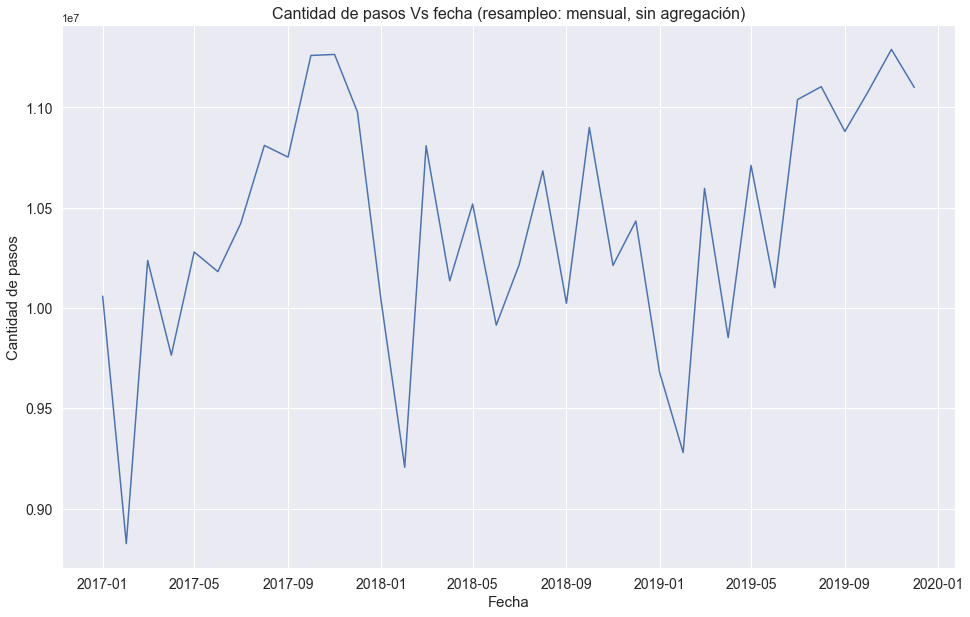

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: mensual, sin agregación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

<Figure size 720x360 with 0 Axes>

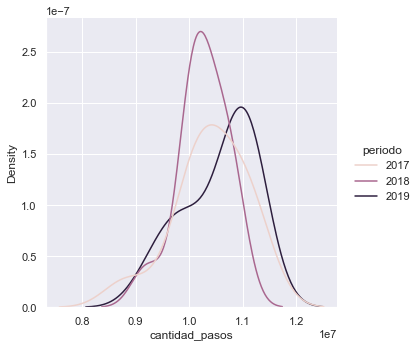

In [ ]:
plt.figure(figsize = (10,5))
sns.displot(data=dataset_analisis , x='cantidad_pasos', hue='periodo', kind="kde")

#### 2.1.2. Cantidad total de pasos (porcentual) Vs periodo (intervalo 2017 - 2019) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.periodo])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis.periodo=dataset_analisis.periodo.astype('str')
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

,periodo,cantidad_pasos
0,2017,33.3
1,2018,32.9
2,2019,33.8


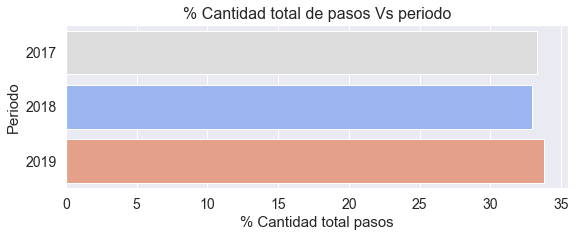

In [ ]:
plt.figure(figsize=(9, 3))
sns.barplot(y="periodo", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm"))
#Formato de la gráfica
plt.title('% Cantidad total de pasos Vs periodo',fontsize=16)
plt.xlabel('% Cantidad total pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### 2.1.3. Cantidad total de pasos (porcentual) Vs mes (intervalo 2017 - 2019) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.mes])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

,mes,cantidad_pasos
0,1,7.9
1,2,7.3
2,3,8.4
3,4,7.9
4,5,8.4
5,6,8.1
6,7,8.5
7,8,8.7
8,9,8.4
9,10,8.9


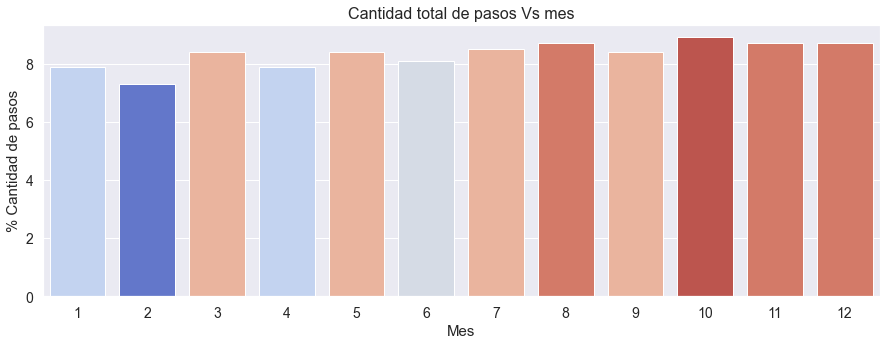

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="mes", 
            y="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm"))

#Formato de la gráfica
plt.title('Cantidad total de pasos Vs mes',fontsize=16)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('% Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
dataset[['mes','cantidad_pasos']].groupby(['mes']).agg({'cantidad_pasos': ['mean', 'sum']})

cantidad_pasos          
              mean       sum
mes                         
1        99.384176  29777785
2       100.708964  27311264
3       104.166938  31642270
4       103.768370  29752986
5       105.683078  31508987
6       104.347550  30197868
7       104.765145  31676894
8       106.867214  32597920
9       107.666747  31656177
10      107.188938  33235002
11      109.625724  32766252
12      107.854285  32511272

#### 2.1.4. Cantidad total de pasos (porcentual) Vs día de la semana (intervalo 2017 - 2019) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.dia_num])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

,dia_num,cantidad_pasos
0,0,14.3
1,1,15.0
2,2,15.4
3,3,15.7
4,4,16.0
5,5,12.7
6,6,10.8


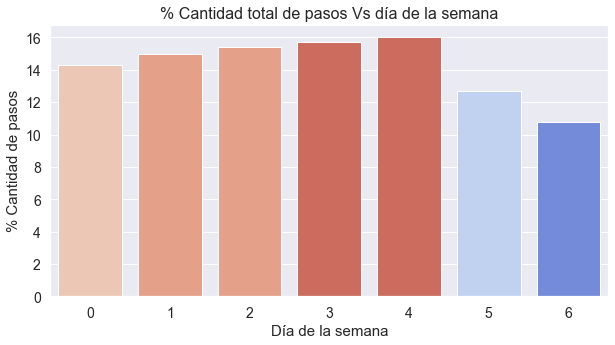

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="dia_num", 
            y="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm"))

#Formato de la gráfica
plt.title('% Cantidad total de pasos Vs día de la semana',fontsize=16)
plt.xlabel('Día de la semana', fontsize=15)
plt.ylabel('% Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### 2.1.5. Cantidad total de pasos (porcentual) Vs hora del día (intervalo 2017 - 2019) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.hora_fin])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

,hora_fin,cantidad_pasos
0,1,1.6
1,2,1.2
2,3,0.8
3,4,0.7
4,5,0.8
5,6,1.6
6,7,3.4
7,8,5.2
8,9,5.8
9,10,5.6


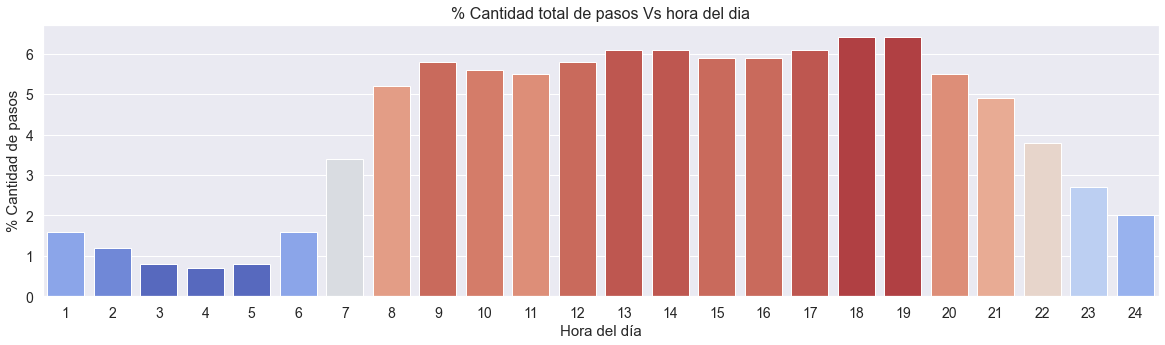

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x="hora_fin", 
            y="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm"))

#Formato de la gráfica
plt.title('% Cantidad total de pasos Vs hora del dia',fontsize=16)
plt.xlabel('Hora del día', fontsize=15)
plt.ylabel('% Cantidad de pasos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### 2.1.6. Cantidad total de pasos (porcentual) Vs estación (intervalo 2017 - 2019) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.estacion])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

,estacion,cantidad_pasos
1,Avellaneda,39.7
3,Illia,27.3
2,Dellepiane,24.0
0,Alberti,4.6
4,PDB,1.5
5,Retiro,1.3
7,Sarmiento,0.9
6,Salguero,0.7


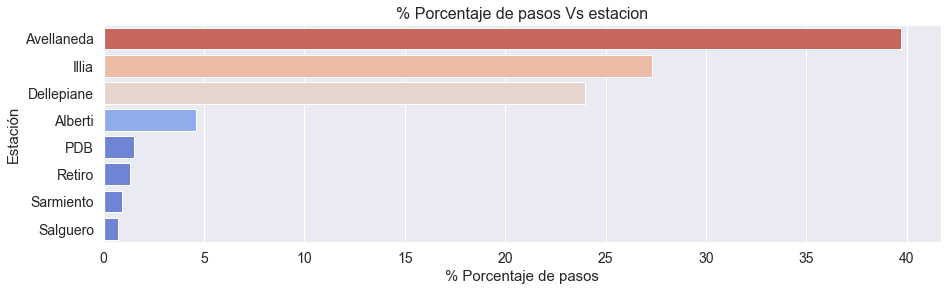

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(y="estacion", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )

#Formato de la gráfica
plt.title('% Porcentaje de pasos Vs estacion',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Estación', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### 2.1.7. Cantidad total de pasos (porcentual) Vs sentido (intervalo 2017 - 2019) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.sentido])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

,sentido,cantidad_pasos
1,Provincia,51.1
0,Centro,48.9


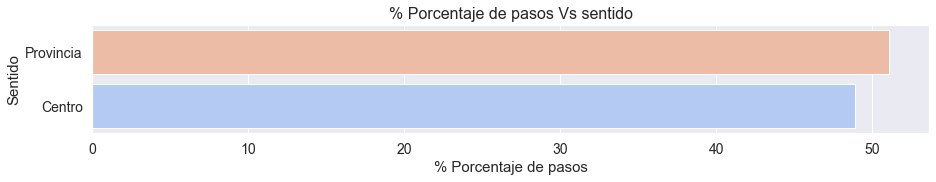

In [ ]:
plt.figure(figsize=(15, 2))
sns.barplot(y="sentido", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
plt.title('% Porcentaje de pasos Vs sentido', fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Sentido', fontsize=15)
plt.tick_params(labelsize=14)

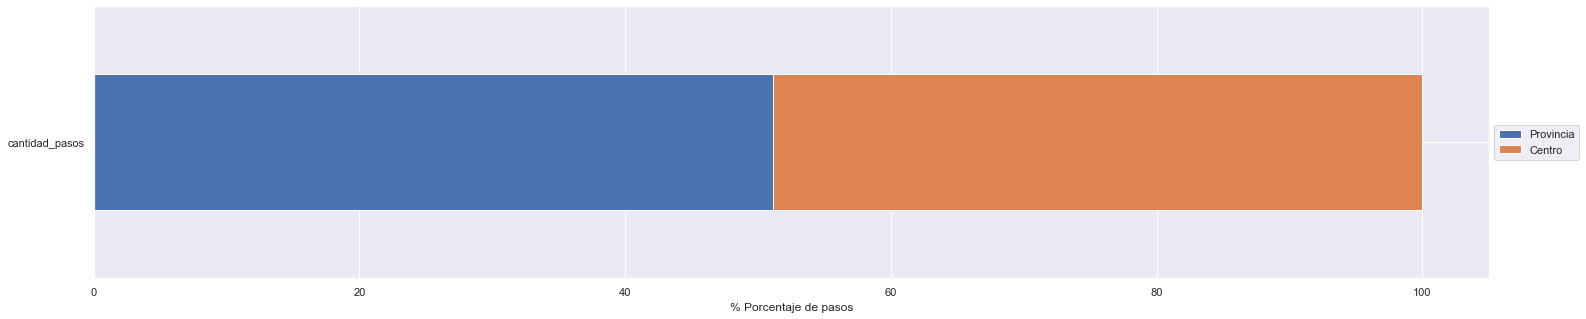

In [ ]:
dataset_analisis.set_index('sentido').T.plot(kind='barh', stacked=True, figsize=(25,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('% Porcentaje de pasos')
plt.show()

#### 2.1.8. Cantidad total de pasos (porcentual) Vs Tipo de vehículo (intervalo 2017 - 2019) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.tipo_vehiculo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

,tipo_vehiculo,cantidad_pasos
0,Liviano,90.3
1,Pesado,9.7


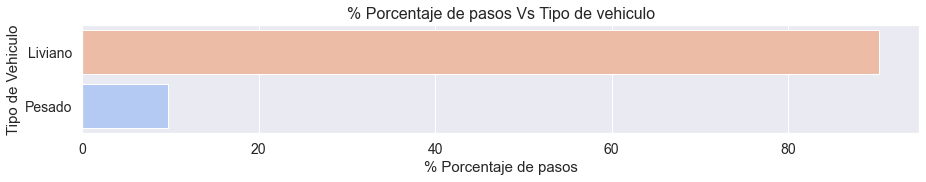

In [ ]:
plt.figure(figsize=(15, 2))
sns.barplot(y="tipo_vehiculo", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
plt.title('% Porcentaje de pasos Vs Tipo de vehiculo', fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Tipo de Vehiculo', fontsize=15)
plt.tick_params(labelsize=14)

#### 2.1.9. Cantidad total de pasos (porcentual) Vs forma de pago (intervalo 2017 - 2019) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.forma_pago])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis

,forma_pago,cantidad_pasos
0,EFECTIVO,48.9
5,TELEPASE,43.8
3,NO COBRADO,4.6
1,EXENTO,1.1
4,T. DISCAPACIDAD,0.9
2,INFRACCION,0.7


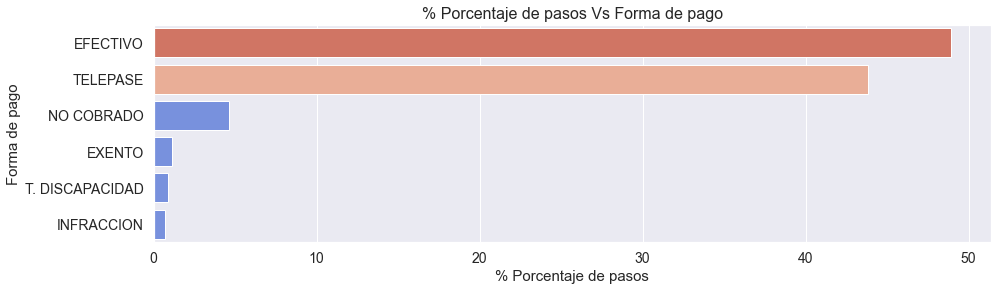

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(y="forma_pago", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
#Formato de la gráfica
plt.title('% Porcentaje de pasos Vs Forma de pago',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Forma de pago', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

### **Paso 2.2.** EDA - multivariado (totalidad del dataset)

#### 2.2.1. Cantidad de pasos Vs fecha (con agregaciones)

#### ---> Cantidad de pasos Vs fecha (sin resampleo, agregado: tipo de pago)

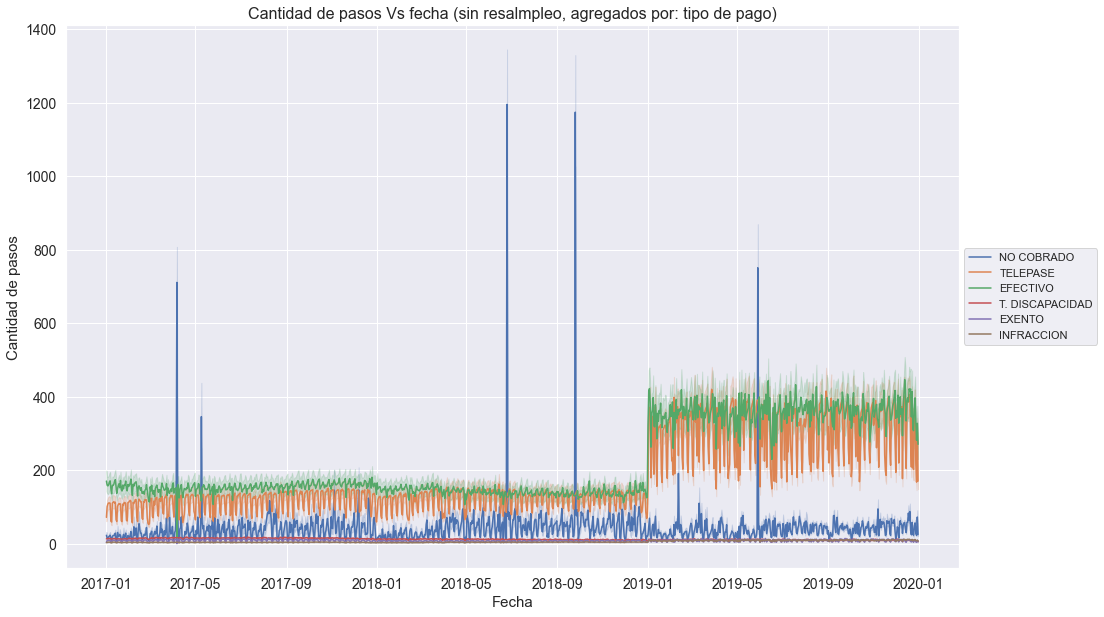

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset, x='fecha', y='cantidad_pasos', hue="forma_pago")

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (sin resalmpleo, agregados por: tipo de pago)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
dataset[['periodo', 'forma_pago', 'cantidad_pasos']].groupby(['forma_pago','periodo']).describe()

cantidad_pasos                                     \
                                 count        mean         std  min   25%   
forma_pago      periodo                                                     
EFECTIVO        2017          447203.0  155.416976  412.790403  1.0   3.0   
                2018          423622.0  142.163530  361.798749  1.0   2.0   
                2019          149338.0  359.060427  532.030328  1.0  16.0   
EXENTO          2017          169889.0    9.874077   15.736986  1.0   2.0   
                2018          162100.0    7.714510   11.146307  1.0   2.0   
                2019          132711.0    9.876499   13.031037  1.0   3.0   
INFRACCION      2017          140275.0    4.487970    5.632329  1.0   1.0   
                2018          153327.0    4.697777    6.132348  1.0   1.0   
                2019          111426.0    9.858184   11.704023  1.0   2.0   
NO COBRADO      2017          117730.0   41.159178  182.221584  1.0   1.0   
                2018          121439.0   50.004760  197.469703  1.0   1.0   
                2019          141280.0   44.363555  132.717882  1.0   3.0   
T. DISCAPACIDAD 2017          100106.0   15.634418   20.844572  1.0   1.0   
                2018           86347.0   12.294336   14.793085  1.0   1.0   
                2019           76000.0   11.074882   12.560349  1.0   2.0   
TELEPASE        2017          397420.0  117.288254  315.386456  1.0   4.0   
                2018          429051.0  125.305957  347.252896  1.0   3.0   
                2019          201384.0  315.666274  532.871902  1.0  20.0   

                                              
                          50%    75%     max  
forma_pago      periodo                       
EFECTIVO        2017     10.0   56.0  3315.0  
                2018      8.0   53.0  2910.0  
                2019     69.0  517.0  2722.0  
EXENTO          2017      5.0   10.0   856.0  
                2018      4.0    9.0   709.0  
                2019      6.0   12.0   736.0  
INFRACCION      2017      2.0    5.0    57.0  
                2018      2.0    5.0    52.0  
                2019      5.0   13.0    84.0  
NO COBRADO      2017      5.0   22.0  4271.0  
                2018      5.0   24.0  5722.0  
                2019     12.0   44.0  6677.0  
T. DISCAPACIDAD 2017      6.0   22.0   152.0  
                2018      6.0   18.0   104.0  
                2019      6.0   16.0    82.0  
TELEPASE        2017     13.0   50.0  3335.0  
                2018     12.0   50.0  3656.0  
                2019     86.0  320.0  4077.0

#### ---> Cantidad de pasos Vs fecha (resampleo: diario, agregado: tipo de pago)

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','forma_pago','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'), 'periodo','forma_pago'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,forma_pago,cantidad_pasos
0,2017-01-01,2017,EFECTIVO,157472
1,2017-01-01,2017,EXENTO,1638
2,2017-01-01,2017,INFRACCION,670
3,2017-01-01,2017,NO COBRADO,5756
4,2017-01-01,2017,T. DISCAPACIDAD,2982
...,...,...,...,...
6548,2019-12-31,2019,EXENTO,1817
6549,2019-12-31,2019,INFRACCION,1902
6550,2019-12-31,2019,NO COBRADO,10375
6551,2019-12-31,2019,T. DISCAPACIDAD,1334


In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

,cantidad_pasos
count,6553.000000
mean,57169.949184
std,75789.147366
min,1.000000
25%,2729.000000
50%,5286.000000
75%,140812.000000
max,303470.000000


In [ ]:
dataset_analisis.groupby(['forma_pago','periodo']).describe()

cantidad_pasos                                        \
                                 count           mean           std      min   
forma_pago      periodo                                                        
EFECTIVO        2017             365.0  190419.008219  23131.664203     48.0   
                2018             363.0  165905.231405  19699.905076  87321.0   
                2019             364.0  147311.445055  15923.459468  88581.0   
EXENTO          2017             365.0    4595.882192   1625.078710      1.0   
                2018             363.0    3444.964187   1108.565454   1332.0   
                2019             364.0    3600.879121   1142.542567   1396.0   
INFRACCION      2017             364.0    1729.532967    500.653195    643.0   
                2018             363.0    1984.286501    518.314364    732.0   
                2019             364.0    3017.741758    652.394449   1324.0   
NO COBRADO      2017             365.0   13275.808219  14172.860130   1785.0   
                2018             365.0   16637.063014  20932.145077   1674.0   
                2019             365.0   17171.734247  17890.178470   2585.0   
T. DISCAPACIDAD 2017             364.0    4299.722527    661.242759   2147.0   
                2018             363.0    2924.460055    474.627863   1240.0   
                2019             364.0    2312.337912    341.827432   1248.0   
TELEPASE        2017             365.0  127706.021918  36027.863123  49547.0   
                2018             363.0  148106.462810  39415.708444  61379.0   
                2019             364.0  174643.233516  46616.531859  69624.0   

                                                                   
                               25%       50%        75%       max  
forma_pago      periodo                                            
EFECTIVO        2017     182460.00  193584.0  204371.00  234908.0  
                2018     155405.50  166053.0  178761.50  211039.0  
                2019     139588.25  149012.5  156786.00  184652.0  
EXENTO          2017       2863.00    5243.0    5939.00    7458.0  
                2018       2173.50    4019.0    4257.00    6228.0  
                2019       2335.75    4161.5    4448.75    5527.0  
INFRACCION      2017       1223.00    1959.0    2089.00    2588.0  
                2018       1543.00    2081.0    2390.50    3231.0  
                2019       2509.75    3206.0    3525.25    4124.0  
NO COBRADO      2017       5500.00   11118.0   17603.00  203456.0  
                2018       6710.00   14282.0   22587.00  273787.0  
                2019       9219.00   13348.0   22839.00  303470.0  
T. DISCAPACIDAD 2017       3825.75    4493.5    4839.50    5289.0  
                2018       2632.00    2951.0    3281.00    3806.0  
                2019       2077.50    2379.5    2566.75    2943.0  
TELEPASE        2017      95091.00  144164.0  155668.00  176709.0  
                2018     110312.50  166501.0  179202.50  197787.0  
                2019     132454.00  188982.5  214376.00  246502.0

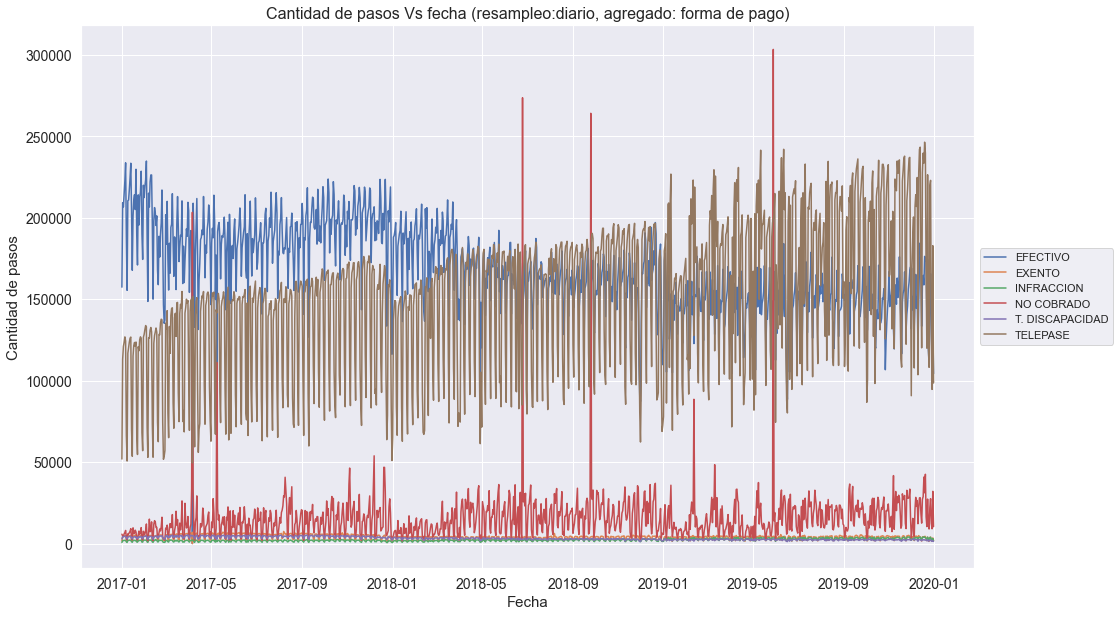

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='forma_pago')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo:diario, agregado: forma de pago)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### ---> Cantidad de pasos Vs fecha (resampleo: semanal, agregado: tipo de pago)

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','forma_pago','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='W'), 'periodo','forma_pago'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,forma_pago,cantidad_pasos
0,2017-01-01,2017,EFECTIVO,157472
1,2017-01-01,2017,EXENTO,1638
2,2017-01-01,2017,INFRACCION,670
3,2017-01-01,2017,NO COBRADO,5756
4,2017-01-01,2017,T. DISCAPACIDAD,2982
...,...,...,...,...
949,2020-01-05,2019,EXENTO,5286
950,2020-01-05,2019,INFRACCION,5035
951,2020-01-05,2019,NO COBRADO,42468
952,2020-01-05,2019,T. DISCAPACIDAD,3103


In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

,cantidad_pasos
count,9.540000e+02
mean,3.926988e+05
std,5.116745e+05
min,6.700000e+02
25%,2.134450e+04
50%,3.704350e+04
75%,9.844552e+05
max,1.472070e+06


In [ ]:
dataset_analisis.groupby(['forma_pago','periodo']).describe()

cantidad_pasos                                         \
                                 count          mean            std       min   
forma_pago      periodo                                                         
EFECTIVO        2017              53.0  1.311376e+06  177839.177724  157472.0   
                2018              53.0  1.136294e+06  172216.119882  109867.0   
                2019              53.0  1.011724e+06  119298.379352  240871.0   
EXENTO          2017              53.0  3.165089e+04    5461.474729    1638.0   
                2018              53.0  2.359475e+04    3698.950116    1912.0   
                2019              53.0  2.473057e+04    3832.595262    5286.0   
INFRACCION      2017              53.0  1.187830e+04    1889.142455     670.0   
                2018              53.0  1.359049e+04    2568.532959    1388.0   
                2019              53.0  2.072562e+04    3051.235508    5035.0   
NO COBRADO      2017              53.0  9.142774e+04   45110.287493    5756.0   
                2018              53.0  1.145760e+05   63992.385984    5814.0   
                2019              53.0  1.182582e+05   52160.945342   42468.0   
T. DISCAPACIDAD 2017              53.0  2.953017e+04    4309.338151    2982.0   
                2018              53.0  2.002979e+04    3328.980032    1598.0   
                2019              53.0  1.588096e+04    2110.980359    3103.0   
TELEPASE        2017              53.0  8.794849e+05  149791.301654   51924.0   
                2018              53.0  1.014390e+06  167096.779078   72776.0   
                2019              53.0  1.199437e+06  190685.503603  281529.0   

                                                                     
                               25%        50%        75%        max  
forma_pago      periodo                                              
EFECTIVO        2017     1280462.0  1327848.0  1388160.0  1468278.0  
                2018     1108643.0  1143234.0  1215682.0  1315272.0  
                2019     1004718.0  1029880.0  1056881.0  1146883.0  
EXENTO          2017       28818.0    32925.0    34693.0    37705.0  
                2018       22508.0    24325.0    25353.0    27966.0  
                2019       23375.0    25183.0    26473.0    31474.0  
INFRACCION      2017       11598.0    12211.0    12679.0    14358.0  
                2018       12535.0    13767.0    15213.0    17773.0  
                2019       19542.0    21270.0    22581.0    25235.0  
NO COBRADO      2017       72238.0    84815.0   100593.0   301947.0  
                2018       85489.0   109258.0   129262.0   390385.0  
                2019       76771.0   126381.0   141195.0   369017.0  
T. DISCAPACIDAD 2017       28342.0    30496.0    31465.0    33014.0  
                2018       19269.0    20040.0    22044.0    24023.0  
                2019       15335.0    16183.0    17003.0    18224.0  
TELEPASE        2017      829802.0   915602.0   960410.0  1056733.0  
                2018      948334.0  1054663.0  1103902.0  1188376.0  
                2019     1120587.0  1224162.0  1310210.0  1472070.0

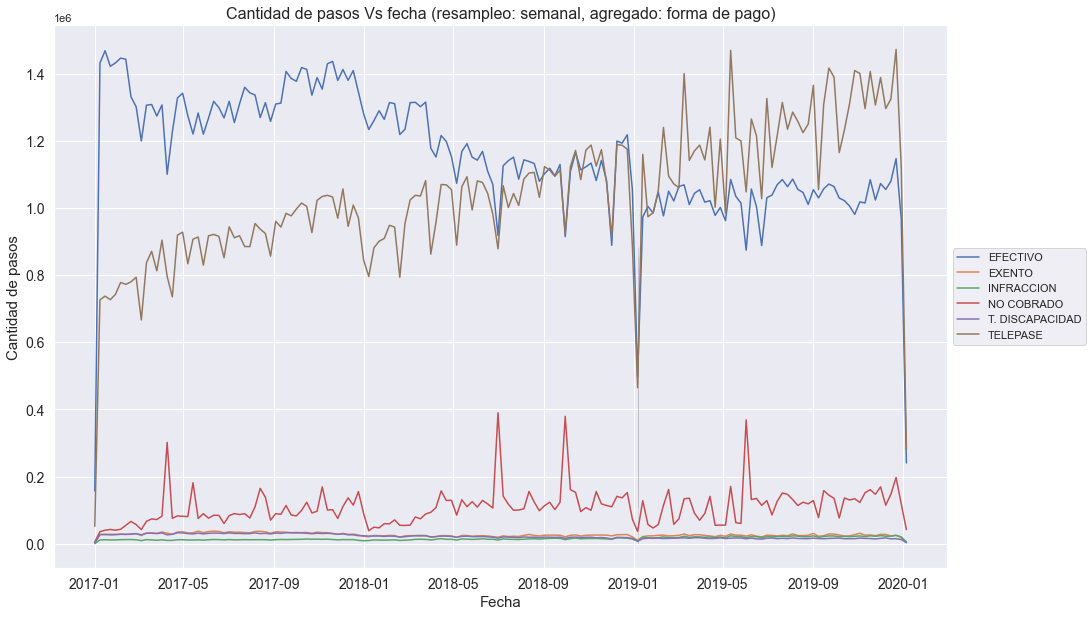

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='forma_pago')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: semanal, agregado: forma de pago)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### ---> Cantidad de pasos Vs fecha (resampleo: mensual, agregado: tipo de pago)

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','forma_pago','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='MS'), 'periodo','forma_pago'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,forma_pago,cantidad_pasos
0,2017-01-01,2017,EFECTIVO,6343570
1,2017-01-01,2017,EXENTO,123277
2,2017-01-01,2017,INFRACCION,51565
3,2017-01-01,2017,NO COBRADO,179033
4,2017-01-01,2017,T. DISCAPACIDAD,121060
...,...,...,...,...
211,2019-12-01,2019,EXENTO,102683
212,2019-12-01,2019,INFRACCION,98262
213,2019-12-01,2019,NO COBRADO,624847
214,2019-12-01,2019,T. DISCAPACIDAD,65873


In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

,cantidad_pasos
count,2.160000e+02
mean,1.734420e+06
std,2.232781e+06
min,4.388100e+04
25%,9.579700e+04
50%,1.696125e+05
75%,4.382518e+06
max,6.343570e+06


In [ ]:
dataset_analisis.groupby(['forma_pago','periodo']).describe()

cantidad_pasos                               \
                                 count          mean            std   
forma_pago      periodo                                               
EFECTIVO        2017              12.0  5.791912e+06  302260.557830   
                2018              12.0  5.018633e+06  351056.362702   
                2019              12.0  4.468447e+06  174320.072986   
EXENTO          2017              12.0  1.397914e+05   16080.887693   
                2018              12.0  1.042102e+05    7190.246523   
                2019              12.0  1.092267e+05    6507.300967   
INFRACCION      2017              12.0  5.246250e+04    3873.228733   
                2018              12.0  6.002467e+04    7874.271353   
                2019              12.0  9.153817e+04    7537.254429   
NO COBRADO      2017              12.0  4.038058e+05  124059.127599   
                2018              12.0  5.060440e+05  169315.316583   
                2019              12.0  5.223069e+05  113555.441577   
T. DISCAPACIDAD 2017              12.0  1.304249e+05    9797.914170   
                2018              12.0  8.846492e+04    8577.209278   
                2019              12.0  7.014092e+04    3315.047167   
TELEPASE        2017              12.0  3.884392e+06  437384.259256   
                2018              12.0  4.480220e+06  392905.893139   
                2019              12.0  5.297511e+06  431320.335813   

                                                                       \
                               min         25%        50%         75%   
forma_pago      periodo                                                 
EFECTIVO        2017     5354339.0  5557206.75  5786916.5  6023406.75   
                2018     4562369.0  4868569.25  4985050.0  5078433.50   
                2019     4130877.0  4390283.75  4484499.0  4616919.00   
EXENTO          2017      110437.0   132526.75   146105.5   148886.00   
                2018       92695.0    98547.00   105069.0   109225.50   
                2019       99672.0   103386.50   110976.5   114661.25   
INFRACCION      2017       46862.0    50743.00    52509.0    54417.50   
                2018       43881.0    57160.75    60125.0    64840.75   
                2019       77011.0    86319.00    93716.5    98055.75   
NO COBRADO      2017      179033.0   339096.75   422345.5   497387.75   
                2018      220069.0   455157.75   529773.0   558158.25   
                2019      337195.0   441586.75   541917.0   590309.50   
T. DISCAPACIDAD 2017      112415.0   126244.00   135561.0   137909.25   
                2018       76426.0    83882.50    86722.5    94783.00   
                2019       65873.0    67829.00    70143.5    71767.25   
TELEPASE        2017     2980157.0  3744672.75  3930332.0  4153016.75   
                2018     3672577.0  4318738.00  4506524.0  4690275.75   
                2019     4498098.0  5041580.25  5398889.0  5597727.50   

                                    
                               max  
forma_pago      periodo             
EFECTIVO        2017     6343570.0  
                2018     5711971.0  
                2019     4709028.0  
EXENTO          2017      160192.0  
                2018      114755.0  
                2019      118068.0  
INFRACCION      2017       60598.0  
                2018       70278.0  
                2019       99359.0  
NO COBRADO      2017      550198.0  
                2018      778017.0  
                2019      689325.0  
T. DISCAPACIDAD 2017      139556.0  
                2018      102362.0  
                2019       77416.0  
TELEPASE        2017     4433883.0  
                2018     5103511.0  
                2019     5815859.0

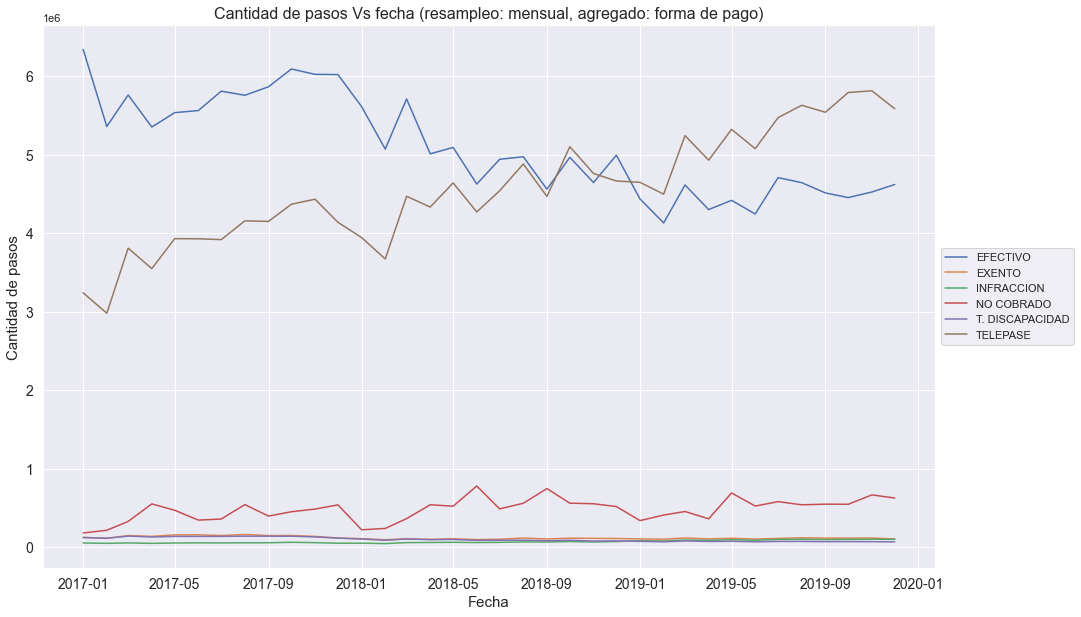

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='forma_pago')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: mensual, agregado: forma de pago)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### ---> Cantidad de pasos Vs fecha (resampleo: diario, agregado: estación)

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','estacion','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='D'), 'periodo','estacion'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,estacion,cantidad_pasos
0,2017-01-01,2017,Alberti,9638
1,2017-01-01,2017,Avellaneda,99631
2,2017-01-01,2017,Dellepiane,62026
3,2017-01-01,2017,Illia,45477
4,2017-01-01,2017,Retiro,2532
...,...,...,...,...
7848,2019-12-31,2019,Illia,43010
7849,2019-12-31,2019,PDB,11802
7850,2019-12-31,2019,Retiro,1151
7851,2019-12-31,2019,Salguero,2261


In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

,cantidad_pasos
count,7853.000000
mean,47705.931109
std,51656.616409
min,14.000000
25%,3481.000000
50%,17129.000000
75%,91587.000000
max,181648.000000


In [ ]:
dataset_analisis.groupby(['estacion','periodo']).describe()

cantidad_pasos                                        \
                            count           mean           std      min   
estacion   periodo                                                        
Alberti    2017             365.0   15861.682192   3278.391490   7347.0   
           2018             365.0   15711.895890   3375.428980   7685.0   
           2019             365.0   15428.073973   3353.699960   7437.0   
Avellaneda 2017             365.0  139209.835616  23143.078178  76421.0   
           2018             365.0  136032.931507  23465.741979  66780.0   
           2019             365.0  132338.504110  21922.418379  68460.0   
Dellepiane 2017             365.0   84092.969863  11756.172051  50802.0   
           2018             365.0   81537.673973  11293.792757  46629.0   
           2019             365.0   80261.263014  11714.063813  47628.0   
Illia      2017             365.0   91974.158904  20101.004502  35435.0   
           2018             365.0   94491.668493  22427.688890    387.0   
           2019             365.0   93575.778082  20395.165583  33529.0   
PDB        2019             216.0   26242.481481  11265.602172     14.0   
Retiro     2017             365.0    6446.104110   2164.232047   1491.0   
           2018             364.0    3842.530220   1263.428290    260.0   
           2019             365.0    3206.301370   1128.797346    892.0   
Salguero   2017             355.0    1737.543662    532.346931     15.0   
           2018             363.0    2622.741047   1362.665048     75.0   
           2019             355.0    3440.507042    894.454160    350.0   
Sarmiento  2017             363.0    2749.834711    676.528027    737.0   
           2018             363.0    3038.187328    820.976307    113.0   
           2019             364.0    3474.390110    871.820101    849.0   

                                                              
                          25%       50%        75%       max  
estacion   periodo                                            
Alberti    2017      14209.00   17088.0   18212.00   21024.0  
           2018      13564.00   16906.0   18187.00   21020.0  
           2019      13590.00   16531.0   17882.00   21303.0  
Avellaneda 2017     124684.00  145869.0  155460.00  179343.0  
           2018     118680.00  144526.0  153334.00  181648.0  
           2019     118755.00  138739.0  148169.00  168417.0  
Dellepiane 2017      77438.00   86509.0   92473.00  107973.0  
           2018      75088.00   84752.0   89129.00  105118.0  
           2019      74284.00   82711.0   88359.00  105392.0  
Illia      2017      74283.00   99296.0  107263.00  123854.0  
           2018      74194.00  103680.0  112327.00  125519.0  
           2019      75908.00  102459.0  109905.00  122390.0  
PDB        2019      14501.75   30310.5   33486.50   53568.0  
Retiro     2017       4139.00    7120.0    8413.00    9895.0  
           2018       2791.25    3960.0    4589.00    6649.0  
           2019       2130.00    3610.0    4051.00    5585.0  
Salguero   2017       1361.00    1810.0    2123.00    2942.0  
           2018       1954.00    2455.0    2941.50   10766.0  
           2019       2883.50    3519.0    4047.50    5819.0  
Sarmiento  2017       2360.00    2795.0    3136.50    4554.0  
           2018       2553.00    3046.0    3516.50    7740.0  
           2019       2957.25    3476.0    4032.25    6188.0

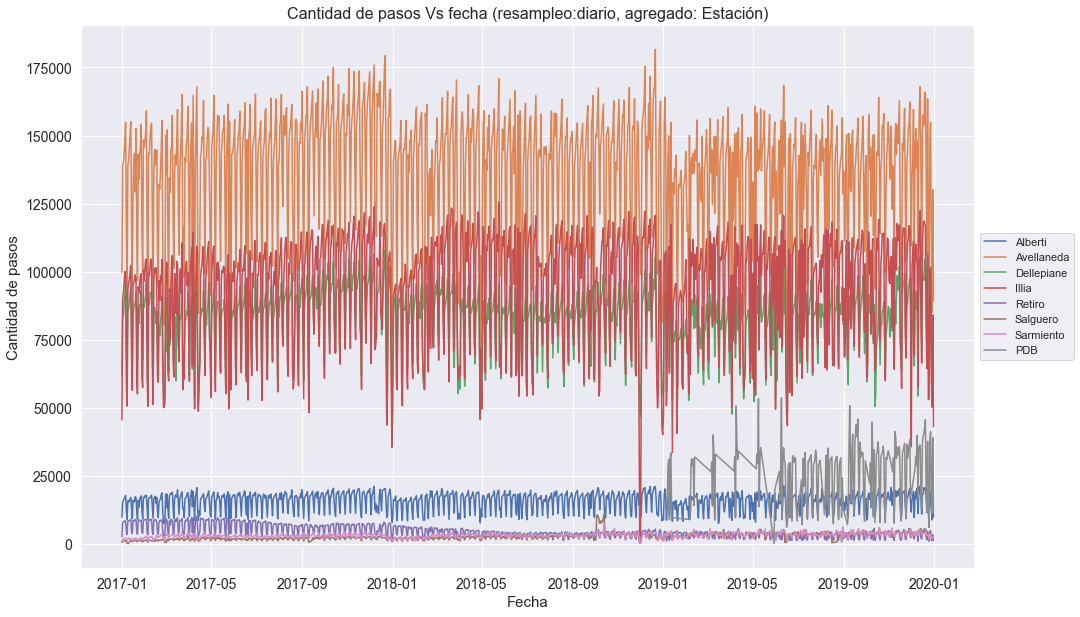

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='estacion')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo:diario, agregado: Estación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### ---> Cantidad de pasos Vs fecha (resampleo: semanal, agregado: estación)

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','estacion','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='W'), 'periodo','estacion'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,estacion,cantidad_pasos
0,2017-01-01,2017,Alberti,9638
1,2017-01-01,2017,Avellaneda,99631
2,2017-01-01,2017,Dellepiane,62026
3,2017-01-01,2017,Illia,45477
4,2017-01-01,2017,Retiro,2532
...,...,...,...,...
1149,2020-01-05,2019,Illia,127053
1150,2020-01-05,2019,PDB,50782
1151,2020-01-05,2019,Retiro,4379
1152,2020-01-05,2019,Salguero,5281


In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

,cantidad_pasos
count,1.154000e+03
mean,3.246401e+05
std,3.508532e+05
min,4.010000e+02
25%,2.326700e+04
50%,1.109880e+05
75%,6.223802e+05
max,1.078510e+06


In [ ]:
dataset_analisis.groupby(['estacion','periodo']).describe()

cantidad_pasos                                          \
                            count           mean            std       min   
estacion   periodo                                                          
Alberti    2017              53.0  109236.113208   15562.868002    9638.0   
           2018              53.0  108204.566038   15783.166272    9063.0   
           2019              53.0  106249.943396   13884.245059   25629.0   
Avellaneda 2017              53.0  958709.245283  132958.125439   99631.0   
           2018              53.0  936830.566038  128479.476265   85601.0   
           2019              53.0  911387.811321  111411.007198  219405.0   
Dellepiane 2017              53.0  579130.830189   81785.034073   62026.0   
           2018              53.0  561533.037736   76868.124452   54639.0   
           2019              53.0  552742.660377   69207.315546  141108.0   
Illia      2017              53.0  633406.943396   95037.593847   45477.0   
           2018              53.0  650744.509434  103635.092846   40103.0   
           2019              53.0  644436.962264   89481.737141  127053.0   
PDB        2019              41.0  138253.073171   62058.041954   13992.0   
Retiro     2017              53.0   44392.981132    7719.374527    2532.0   
           2018              53.0   26390.207547    6024.661706    1205.0   
           2019              53.0   22081.132075    3766.908782    4379.0   
Salguero   2017              53.0   11638.264151    3507.755167     401.0   
           2018              53.0   17963.301887    8258.568808    1312.0   
           2019              53.0   23044.905660    5151.662298    5281.0   
Sarmiento  2017              53.0   18833.773585    3981.452859     737.0   
           2018              53.0   20808.716981    4650.840223    1432.0   
           2019              53.0   23861.849057    4314.021564    4655.0   

                                                              
                         25%       50%        75%        max  
estacion   periodo                                            
Alberti    2017     105339.0  111453.0   114777.0   124861.0  
           2018     104294.0  110774.0   114081.0   126838.0  
           2019     102274.0  108703.0   113156.0   125806.0  
Avellaneda 2017     932110.0  972611.0  1011838.0  1078510.0  
           2018     915263.0  959324.0   984854.0  1062382.0  
           2019     902705.0  927571.0   956925.0  1039883.0  
Dellepiane 2017     561110.0  583798.0   615316.0   659108.0  
           2018     551763.0  573816.0   585726.0   634812.0  
           2019     541990.0  559436.0   578388.0   670699.0  
Illia      2017     605508.0  640626.0   671795.0   727544.0  
           2018     638604.0  673936.0   701209.0   744460.0  
           2019     633384.0  656928.0   687950.0   732906.0  
PDB        2019      89252.0  151548.0   181425.0   247650.0  
Retiro     2017      40484.0   44207.0    49864.0    53557.0  
           2018      23238.0   24831.0    29338.0    38875.0  
           2019      20314.0   22854.0    24019.0    29557.0  
Salguero   2017      10617.0   12023.0    14149.0    16454.0  
           2018      14275.0   16454.0    19035.0    58395.0  
           2019      20121.0   23741.0    26691.0    30405.0  
Sarmiento  2017      17865.0   19787.0    21135.0    24765.0  
           2018      18849.0   21522.0    23686.0    32441.0  
           2019      21735.0   24326.0    26928.0    29211.0

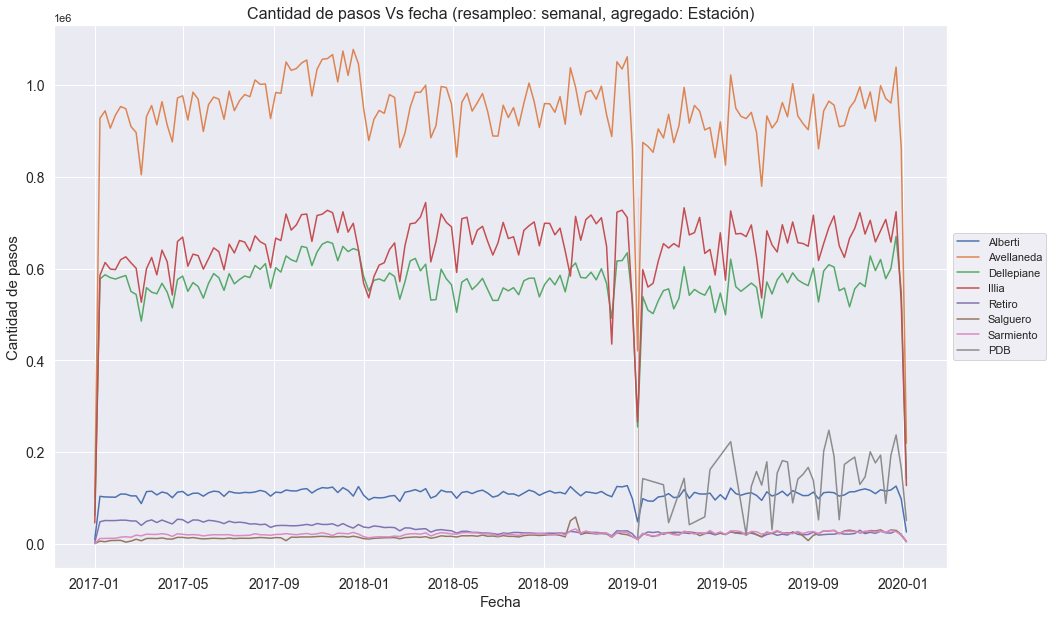

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='estacion')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: semanal, agregado: Estación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### ---> Cantidad de pasos Vs fecha (resampleo: mensual, agregado: estación)

In [ ]:
dataset_analisis =  dataset[['fecha','periodo','estacion','cantidad_pasos']]\
        .groupby([pd.Grouper(key= 'fecha', freq='MS'), 'periodo','estacion'])\
        .sum().reset_index()
dataset_analisis

,fecha,periodo,estacion,cantidad_pasos
0,2017-01-01,2017,Alberti,452578
1,2017-01-01,2017,Avellaneda,4108488
2,2017-01-01,2017,Dellepiane,2559988
3,2017-01-01,2017,Illia,2639349
4,2017-01-01,2017,Retiro,220065
...,...,...,...,...
259,2019-12-01,2019,Illia,2778602
260,2019-12-01,2019,PDB,734579
261,2019-12-01,2019,Retiro,101547
262,2019-12-01,2019,Salguero,112010


In [ ]:
dataset_analisis[['cantidad_pasos']].describe()

,cantidad_pasos
count,2.640000e+02
mean,1.419071e+06
std,1.527570e+06
min,2.656500e+04
25%,1.019838e+05
50%,4.830990e+05
75%,2.726121e+06
max,4.541063e+06


In [ ]:
dataset_analisis.groupby(['estacion','periodo']).describe()

cantidad_pasos                                          \
                            count          mean            std        min   
estacion   periodo                                                          
Alberti    2017              12.0  4.824595e+05   30178.076047   407688.0   
           2018              12.0  4.779035e+05   26483.392173   418815.0   
           2019              12.0  4.692706e+05   24955.029963   421777.0   
Avellaneda 2017              12.0  4.234299e+06  275857.522303  3579521.0   
           2018              12.0  4.137668e+06  184935.564719  3692071.0   
           2019              12.0  4.025296e+06  193609.179983  3632040.0   
Dellepiane 2017              12.0  2.557828e+06  180264.460150  2194223.0   
           2018              12.0  2.480104e+06  105324.037087  2289973.0   
           2019              12.0  2.441280e+06  134064.686429  2170854.0   
Illia      2017              12.0  2.797547e+06  204087.059815  2364688.0   
           2018              12.0  2.874122e+06  164344.004525  2551479.0   
           2019              12.0  2.846263e+06  157478.608154  2600777.0   
PDB        2019              12.0  4.723647e+05  249342.768878   156131.0   
Retiro     2017              12.0  1.960690e+05   20346.989896   166072.0   
           2018              12.0  1.165568e+05   20306.966280    96390.0   
           2019              12.0  9.752500e+04    6670.903196    85164.0   
Salguero   2017              12.0  5.140233e+04   13016.536785    26565.0   
           2018              12.0  7.933792e+04   28593.143948    51414.0   
           2019              12.0  1.017817e+05   13069.371956    78744.0   
Sarmiento  2017              12.0  8.318250e+04   13283.116505    51781.0   
           2018              12.0  9.190517e+04   14810.876936    65016.0   
           2019              12.0  1.053898e+05    9877.771481    86281.0   

                                                                  
                           25%        50%         75%        max  
estacion   periodo                                                
Alberti    2017      476414.00   489290.0   498492.50   518146.0  
           2018      469720.50   475555.0   502548.00   506904.0  
           2019      453762.50   475671.5   488093.75   500957.0  
Avellaneda 2017     4141617.00  4224271.0  4435514.75  4541063.0  
           2018     4057039.50  4142418.0  4289034.00  4380598.0  
           2019     3883543.50  4149954.5  4169446.25  4180398.0  
Dellepiane 2017     2467549.25  2550650.0  2684316.00  2788825.0  
           2018     2417715.00  2474368.0  2543224.75  2646010.0  
           2019     2324201.50  2477479.5  2542381.50  2608195.0  
Illia      2017     2705076.75  2791954.5  2924712.50  3089570.0  
           2018     2814447.25  2878886.0  3002133.75  3075393.0  
           2019     2717209.25  2906005.5  2984611.50  3026728.0  
PDB        2019      211491.25   593562.5   700488.25   734579.0  
Retiro     2017      182526.50   194000.5   212148.75   225026.0  
           2018      102283.75   112384.5   126126.25   164726.0  
           2019       93944.00    99323.5   101682.25   107575.0  
Salguero   2017       50149.25    52405.5    59222.75    67070.0  
           2018       66195.25    74010.0    83341.00   162198.0  
           2019       90968.75   102222.0   112437.25   118944.0  
Sarmiento  2017       82980.50    86715.5    92400.00    93876.0  
           2018       87498.50    93798.5    97960.75   121539.0  
           2019      103435.25   107866.0   112245.50   114778.0

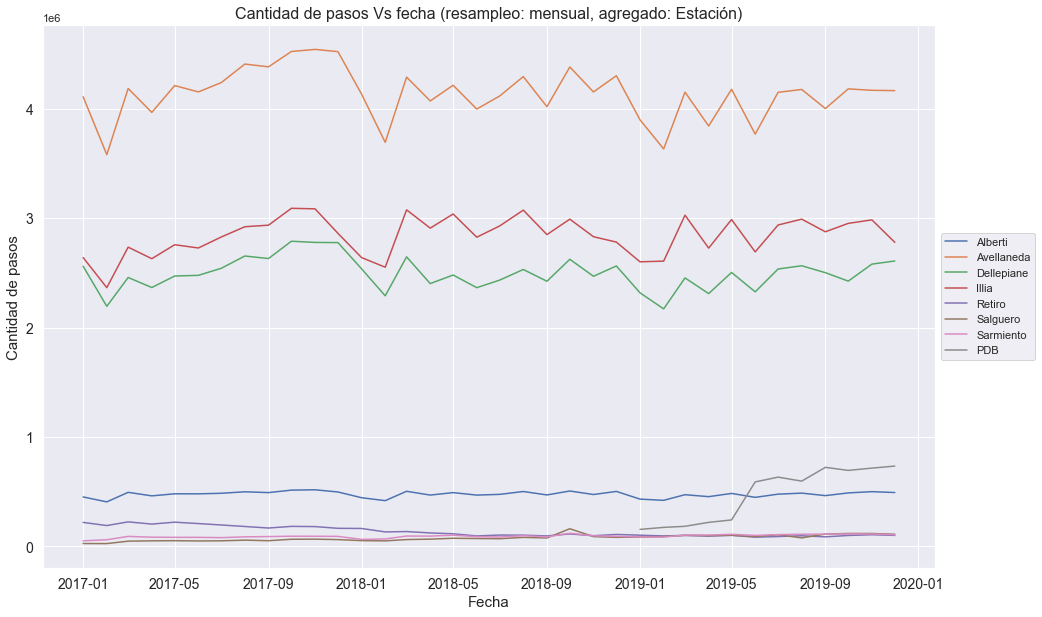

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=dataset_analisis, x='fecha', y='cantidad_pasos', hue='estacion')

#Formato de la gráfica
plt.title('Cantidad de pasos Vs fecha (resampleo: mensual, agregado: Estación)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### 2.1.2. Cantidad total de pasos Vs periodo (agregado por forma de pago) 

In [ ]:
# Generamos el dataset necesario para el analisis del comportamiento descrito
dataset_analisis=dataset.groupby([dataset.forma_pago, dataset.periodo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='periodo', ascending=False)
dataset_analisis.periodo=dataset_analisis.periodo.astype('str')
dataset_analisis

,forma_pago,periodo,cantidad_pasos
17,TELEPASE,2019,63570137
2,EFECTIVO,2019,53621366
5,EXENTO,2019,1310720
8,INFRACCION,2019,1098458
11,NO COBRADO,2019,6267683
14,T. DISCAPACIDAD,2019,841691
13,T. DISCAPACIDAD,2018,1061579
16,TELEPASE,2018,53762646
4,EXENTO,2018,1250522
7,INFRACCION,2018,720296


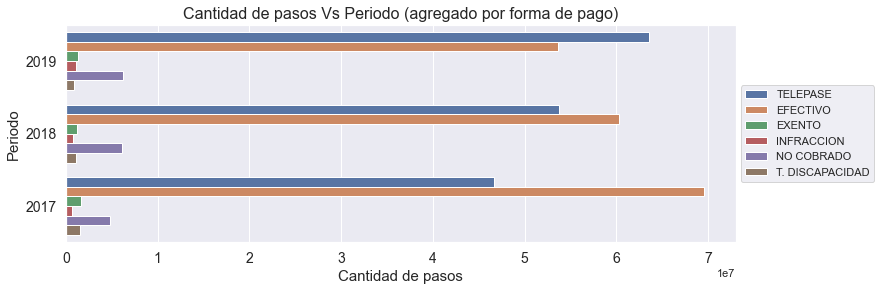

In [ ]:
# Generamos el barplot del comportmiento descrito
plt.figure(figsize=(12, 4))
sns.barplot(y="periodo", 
            x="cantidad_pasos", 
            hue='forma_pago',
            data=dataset_analisis
            )
#Formato de la gráfica
plt.title('Cantidad de pasos Vs Periodo (agregado por forma de pago)',fontsize=16)
plt.xlabel('Cantidad de pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
# Podemos generar la representación tambien a manera de staked bar, que es lo que haremos en las celdas siguientes
dataset_analisis=dataset.groupby([dataset.forma_pago, dataset.periodo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='periodo', ascending=False)
dataset_analisis.periodo=dataset_analisis.periodo.astype('str')
dataset_analisis.sort_values(by=['periodo', 'cantidad_pasos'],  ascending=[False,False], inplace=True)
dataset_analisis

,forma_pago,periodo,cantidad_pasos
17,TELEPASE,2019,63570137
2,EFECTIVO,2019,53621366
11,NO COBRADO,2019,6267683
5,EXENTO,2019,1310720
8,INFRACCION,2019,1098458
14,T. DISCAPACIDAD,2019,841691
1,EFECTIVO,2018,60223599
16,TELEPASE,2018,53762646
10,NO COBRADO,2018,6072528
4,EXENTO,2018,1250522


In [ ]:
# Debemos hacer un pivot de la tabla para poder generar la grafica tipo stacked bar
dataset_analisis=dataset_analisis.pivot_table(index=["periodo"], 
                    columns='forma_pago', 
                    values='cantidad_pasos')
dataset_analisis

forma_pago,EFECTIVO,EXENTO,INFRACCION,NO COBRADO,T. DISCAPACIDAD,TELEPASE
periodo,,,,,,
2017,69502938,1677497,629550,4845670,1565099,46612698
2018,60223599,1250522,720296,6072528,1061579,53762646
2019,53621366,1310720,1098458,6267683,841691,63570137


In [ ]:
# Dado que queremos observar la grafica de manera porcentual, dividiremos los registros de cada año
# en el total de valores para ese año en especifico
for i in dataset_analisis.index:
    dataset_analisis.loc[i,:]=round(100*(dataset_analisis.loc[i,:]/(dataset_analisis.loc[i,:].sum())),1)
dataset_analisis

forma_pago,EFECTIVO,EXENTO,INFRACCION,NO COBRADO,T. DISCAPACIDAD,TELEPASE
periodo,,,,,,
2017,55.7,1.3,0.5,3.9,1.3,37.3
2018,48.9,1.0,0.6,4.9,0.9,43.7
2019,42.3,1.0,0.9,4.9,0.7,50.2


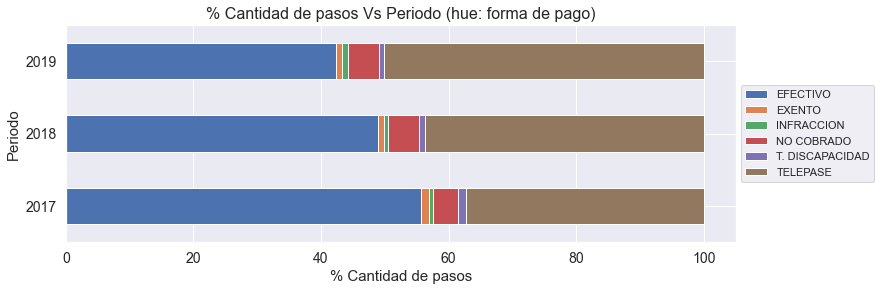

In [ ]:
# Generamos la grafica de tipo stacked bar de manera porcentual
dataset_analisis.plot(kind='barh', stacked=True, figsize=(12,4), legend='False')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Formato de la gráfica
plt.title('% Cantidad de pasos Vs Periodo (hue: forma de pago)',fontsize=16)
plt.xlabel('% Cantidad de pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()


#### 2.1.3. Cantidad total de pasos Vs periodo (agregado por estación) 

In [ ]:
# Podemos generar la representación tambien a manera de staked bar, que es lo que haremos en las celdas siguientes
dataset_analisis=dataset.groupby([dataset.estacion, dataset.periodo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='periodo', ascending=False)
dataset_analisis.periodo=dataset_analisis.periodo.astype('str')
dataset_analisis.sort_values(by=['periodo', 'cantidad_pasos'],  ascending=[False,False], inplace=True)
dataset_analisis

,estacion,periodo,cantidad_pasos
5,Avellaneda,2019,48303554
11,Illia,2019,34155159
8,Dellepiane,2019,29295361
12,PDB,2019,5668376
2,Alberti,2019,5631247
21,Sarmiento,2019,1264678
18,Salguero,2019,1221380
15,Retiro,2019,1170300
4,Avellaneda,2018,49652020
10,Illia,2018,34489459


In [ ]:
# Debemos hacer un pivot de la tabla para poder generar la grafica tipo stacked bar
dataset_analisis=dataset_analisis.pivot_table(index=["periodo"], 
                    columns='estacion', 
                    values='cantidad_pasos')
dataset_analisis

estacion,Alberti,Avellaneda,Dellepiane,Illia,PDB,Retiro,Salguero,Sarmiento
periodo,,,,,,,,
2017,5789514.0,50811590.0,30693934.0,33570568.0,NaN,2352828.0,616828.0,998190.0
2018,5734842.0,49652020.0,29761251.0,34489459.0,NaN,1398681.0,952055.0,1102862.0
2019,5631247.0,48303554.0,29295361.0,34155159.0,5668376.0,1170300.0,1221380.0,1264678.0


In [ ]:
# Dado que queremos observar la grafica de manera porcentual, dividiremos los registros de cada año
# en el total de valores para ese año en especifico
for i in dataset_analisis.index:
    dataset_analisis.loc[i,:]=round(100*(dataset_analisis.loc[i,:]/(dataset_analisis.loc[i,:].sum())),1)
dataset_analisis

estacion,Alberti,Avellaneda,Dellepiane,Illia,PDB,Retiro,Salguero,Sarmiento
periodo,,,,,,,,
2017,4.6,40.7,24.6,26.9,NaN,1.9,0.5,0.8
2018,4.7,40.3,24.2,28.0,NaN,1.1,0.8,0.9
2019,4.4,38.1,23.1,27.0,4.5,0.9,1.0,1.0


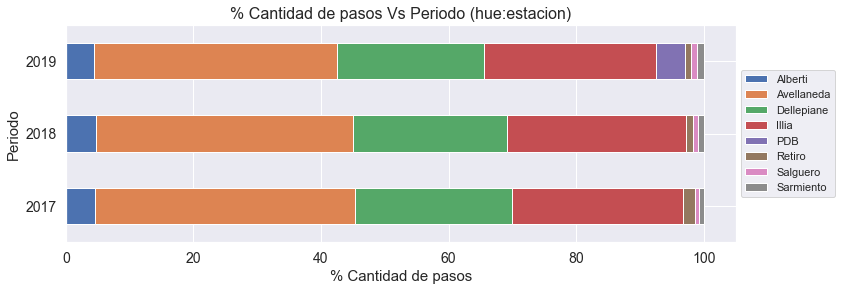

In [ ]:
# Generamos la grafica de tipo stacked bar de manera porcentual
dataset_analisis.plot(kind='barh', stacked=True, figsize=(12,4), legend='False')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('% Cantidad de pasos Vs Periodo (hue:estacion)',fontsize=16)
plt.xlabel('% Cantidad de pasos', fontsize=15)
plt.ylabel('Periodo', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### 2.1.4. Cantidad total de pasos Vs hora del dia (agregado por año) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.periodo,dataset.hora_fin])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis

,periodo,hora_fin,cantidad_pasos
0,2017,1,2012805
1,2017,2,1494631
2,2017,3,1035795
3,2017,4,806483
4,2017,5,974348
...,...,...,...
67,2019,20,6905351
68,2019,21,6056895
69,2019,22,4714698
70,2019,23,3373187


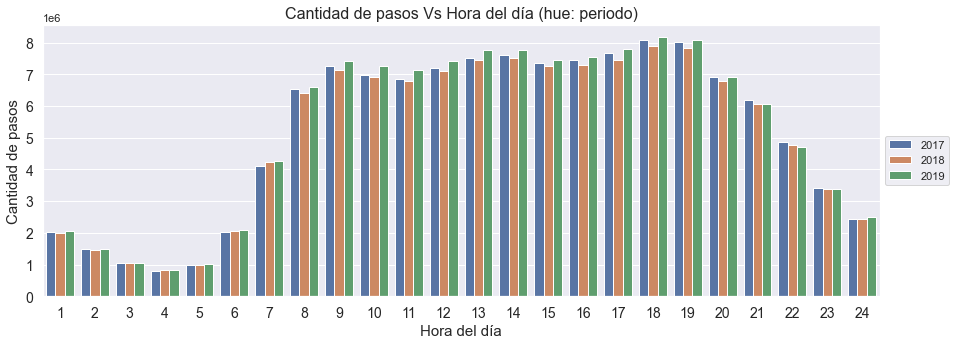

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="hora_fin", 
            y="cantidad_pasos", 
            hue='periodo',
            data=dataset_analisis,
            #palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
#Formato de la gráfica
plt.title('Cantidad de pasos Vs Hora del día (hue: periodo)',fontsize=16)
plt.xlabel('Hora del día', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### 2.1.5. Cantidad total de pasos Vs hora del dia (agregado por sentido) 

In [ ]:
dataset_analisis=dataset.groupby([dataset.sentido,dataset.hora_fin])['cantidad_pasos'].sum().to_frame().reset_index()
dataset_analisis

,sentido,hora_fin,cantidad_pasos
0,Centro,1,2538398
1,Centro,2,1906822
2,Centro,3,1355127
3,Centro,4,1090446
4,Centro,5,1505996
5,Centro,6,3669604
6,Centro,7,7918303
7,Centro,8,11801840
8,Centro,9,12434486
9,Centro,10,11761049


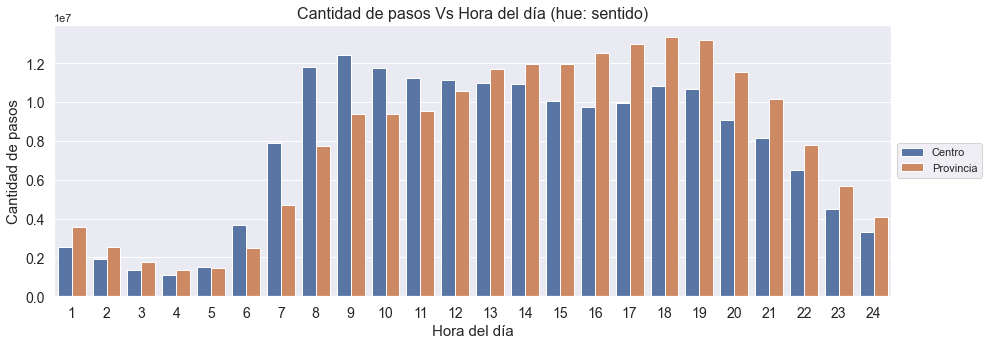

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="hora_fin", 
            y="cantidad_pasos", 
            hue='sentido',
            data=dataset_analisis,
            #palette=colors_from_values(dataset_analisis['cantidad_pasos'], "coolwarm")
            )
plt.title('Cantidad de pasos Vs Hora del día (hue: sentido)',fontsize=16)
plt.xlabel('Hora del día', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### 2.2.6. Cantidad total de pasos Vs estación (agregado por tipo de vehiculo) 

In [ ]:
# Podemos generar la representación tambien a manera de staked bar, que es lo que haremos en las celdas siguientes
dataset_analisis=dataset.groupby([dataset.tipo_vehiculo, dataset.estacion])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='estacion', ascending=False)
dataset_analisis.forma_pago=dataset_analisis.estacion.astype('str')
dataset_analisis.sort_values(by=['estacion', 'cantidad_pasos'],  ascending=[False,False], inplace=True)
dataset_analisis

,tipo_vehiculo,estacion,cantidad_pasos
7,Liviano,Sarmiento,3315343
15,Pesado,Sarmiento,50387
6,Liviano,Salguero,2723682
14,Pesado,Salguero,66581
5,Liviano,Retiro,2886954
13,Pesado,Retiro,2034855
12,Pesado,PDB,4777445
4,Liviano,PDB,890931
3,Liviano,Illia,98218763
11,Pesado,Illia,3996423


In [ ]:
# Debemos hacer un pivot de la tabla para poder generar la grafica tipo stacked bar
dataset_analisis=dataset_analisis.pivot_table(index=["estacion"], 
                    columns='tipo_vehiculo', 
                    values='cantidad_pasos')
dataset_analisis

tipo_vehiculo,Liviano,Pesado
estacion,,
Alberti,16542845,612758
Avellaneda,133116334,15650830
Dellepiane,80467381,9283165
Illia,98218763,3996423
PDB,890931,4777445
Retiro,2886954,2034855
Salguero,2723682,66581
Sarmiento,3315343,50387


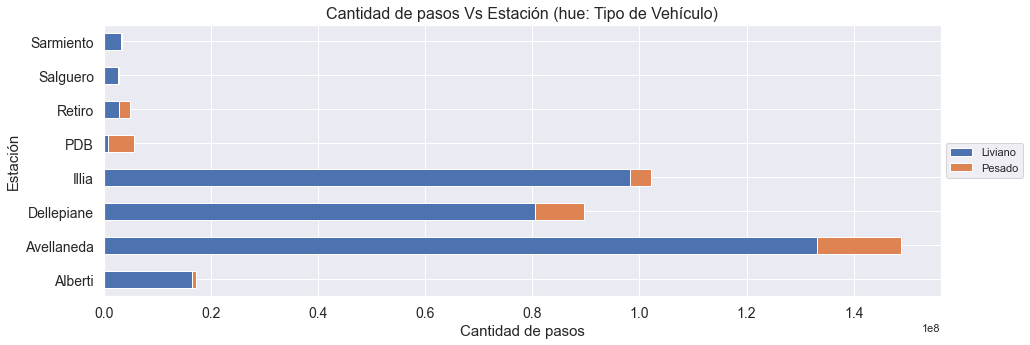

In [ ]:
# Generamos la grafica de tipo stacked bar de manera porcentual
dataset_analisis.plot(kind='barh', stacked=True, figsize=(15,5), legend='False')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Formato de la gráfica
plt.title('Cantidad de pasos Vs Estación (hue: Tipo de Vehículo)',fontsize=16)
plt.xlabel('Cantidad de pasos', fontsize=15)
plt.ylabel('Estación', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
# Dado que queremos observar la grafica de manera porcentual, dividiremos los registros de cada año
# en el total de valores para ese año en especifico
for i in dataset_analisis.index:
    dataset_analisis.loc[i,:]=round(100*(dataset_analisis.loc[i,:]/(dataset_analisis.loc[i,:].sum())),1)
dataset_analisis

tipo_vehiculo,Liviano,Pesado
estacion,,
Alberti,96.4,3.6
Avellaneda,89.5,10.5
Dellepiane,89.7,10.3
Illia,96.1,3.9
PDB,15.7,84.3
Retiro,58.7,41.3
Salguero,97.6,2.4
Sarmiento,98.5,1.5


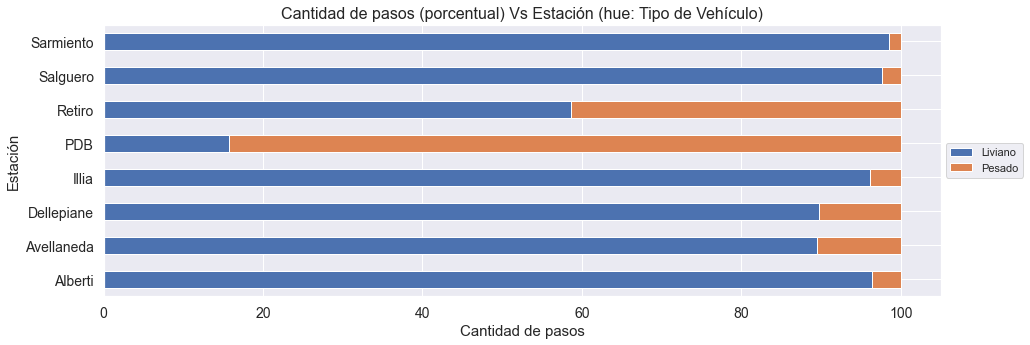

In [ ]:
# Generamos la grafica de tipo stacked bar de manera porcentual
dataset_analisis.plot(kind='barh', stacked=True, figsize=(15,5), legend='False')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Formato de la gráfica
plt.title('Cantidad de pasos (porcentual) Vs Estación (hue: Tipo de Vehículo)',fontsize=16)
plt.xlabel('Cantidad de pasos', fontsize=15)
plt.ylabel('Estación', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

#### 2.2.7. Cantidad total de pasos Vs forma de pago (agregado por tipo de vehiculo) 

In [ ]:
# Podemos generar la representación tambien a manera de staked bar, que es lo que haremos en las celdas siguientes
dataset_analisis=dataset.groupby([dataset.tipo_vehiculo, dataset.forma_pago])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='forma_pago', ascending=False)
dataset_analisis.forma_pago=dataset_analisis.forma_pago.astype('str')
dataset_analisis.sort_values(by=['forma_pago', 'cantidad_pasos'],  ascending=[False,False], inplace=True)
dataset_analisis

,tipo_vehiculo,forma_pago,cantidad_pasos
5,Liviano,TELEPASE,140854411
11,Pesado,TELEPASE,23091070
4,Liviano,T. DISCAPACIDAD,3408349
10,Pesado,T. DISCAPACIDAD,60020
3,Liviano,NO COBRADO,15346681
9,Pesado,NO COBRADO,1839200
2,Liviano,INFRACCION,1844773
8,Pesado,INFRACCION,603531
1,Liviano,EXENTO,3166414
7,Pesado,EXENTO,1072325


In [ ]:
# Debemos hacer un pivot de la tabla para poder generar la grafica tipo stacked bar
dataset_analisis=dataset_analisis.pivot_table(index=["forma_pago"], 
                    columns='tipo_vehiculo', 
                    values='cantidad_pasos')
dataset_analisis

tipo_vehiculo,Liviano,Pesado
forma_pago,,
EFECTIVO,173541605,9806298
EXENTO,3166414,1072325
INFRACCION,1844773,603531
NO COBRADO,15346681,1839200
T. DISCAPACIDAD,3408349,60020
TELEPASE,140854411,23091070


In [ ]:
# Dado que queremos observar la grafica de manera porcentual, dividiremos los registros de cada año
# en el total de valores para ese año en especifico
for i in dataset_analisis.index:
    dataset_analisis.loc[i,:]=round(100*(dataset_analisis.loc[i,:]/(dataset_analisis.loc[i,:].sum())),1)
dataset_analisis

tipo_vehiculo,Liviano,Pesado
forma_pago,,
EFECTIVO,94.7,5.3
EXENTO,74.7,25.3
INFRACCION,75.3,24.7
NO COBRADO,89.3,10.7
T. DISCAPACIDAD,98.3,1.7
TELEPASE,85.9,14.1


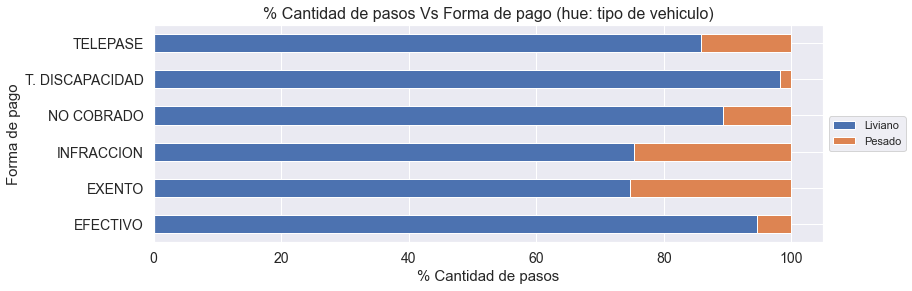

In [ ]:
# Generamos la grafica de tipo stacked bar de manera porcentual
dataset_analisis.plot(kind='barh', stacked=True, figsize=(12,4), legend='False')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Formato de la gráfica
plt.title('% Cantidad de pasos Vs Forma de pago (hue: tipo de vehiculo)',fontsize=16)
plt.xlabel('% Cantidad de pasos', fontsize=15)
plt.ylabel('Forma de pago', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()